In [9]:
# Run if using on google collab, change path accordingly
from google.colab import drive # type: ignore
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/ML - LGI/Project_Unsupervised/'

Mounted at /content/drive


In [ ]:
# run if running locally
path = ''

In [8]:
!pip install git+https://github.com/sevamoo/SOMPY.git #egg=SOMPY
!pip install scikit-image

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-78o3he6b
  Running command git clone --filter=blob:none --quiet https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-78o3he6b
  Resolved https://github.com/sevamoo/SOMPY.git to commit 6aca604b06e5eea1391ecf507810c7aabafc3f8b
  Preparing metadata (setup.py) ... done
  Created wheel for SOMPY: filename=SOMPY-1.1.1-py3-none-any.whl size=29177 sha256=2f441f73a37a0e5521f15288a0176556556163d8888556e2e222ef9db5aa605e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh1q0hpv/wheels/88/5c/6c/4f6b658484ba3ae52ed93a9ffa0e4d54cbfb3f4e2624b6fdc0
Successfully built SOMPY


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import multiprocessing
import sompy
from sompy.sompy import SOMFactory

cpuc = multiprocessing.cpu_count()-1

#setting seaborn visual style in plt
sns.set_theme()

# Integration & Exploration

In [26]:
# dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
# print(f"Duplicaded: {dataDF.duplicated().sum()}\nMissing: {dataDF.isna().sum().sum()}\nNon-Registered (empty): {(dataDF["Registered"] != "Yes").sum()}")

In [27]:
# import the data and drop remove useless stuff
dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
dataDF: pd.DataFrame = dataDF.set_index('Userid')
dfSuccess: pd.DataFrame = pd.read_excel(path+'data/Descriptive_Data.xlsx',sheet_name=1)
dfSuccess = dfSuccess.set_index('Userid')
dataDF = dataDF.join(dfSuccess, 'Userid')
dataDF = dataDF.drop('Observations', axis=1).drop_duplicates()
dataDF = dataDF[dataDF['Registered'] == 'Yes']
dataDF = dataDF.drop('Registered', axis=1)

In [28]:
metricFeatures: list[str] = ['Application order','Previous qualification score','Entry score','Age at enrollment','N units credited 1st period',
       'N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period','Social Popularity']
categoricalFeatures: list[str] =  ['Application mode','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation']
boolFeatures: list[str] = ['Morning shift participation','Displaced','Special needs','Debtor','Regularized Fees','Gender_Male','External Funding','International']

academicFeatures: list[str] = ['Previous qualification score','Entry score','N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period']
demographicFeatures: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']

In [29]:
dataDF[metricFeatures].describe()

Application order  Previous qualification score  Entry score  \
count        4336.000000                   4424.000000  4424.000000   
mean            1.727168                    132.613314   126.978119   
std             1.317108                     13.188332    14.482001   
min             0.000000                     95.000000    95.000000   
25%             1.000000                    125.000000   117.900000   
50%             1.000000                    133.100000   126.100000   
75%             2.000000                    140.000000   134.800000   
max             9.000000                    190.000000   190.000000   

       Age at enrollment  N units credited 1st period  \
count        4336.000000                  4336.000000   
mean           23.271679                     0.711255   
std             7.593933                     2.367723   
min            17.000000                     0.000000   
25%            19.000000                     0.000000   
50%            20.000000                     0.000000   
75%            25.000000                     0.000000   
max            70.000000                    20.000000   

       N units taken 1st period  N scored units 1st period  \
count               4336.000000                4336.000000   
mean                   6.264991                   8.297048   
std                    2.477978                   4.181946   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   26.000000                  45.000000   

       N units approved 1st period  Average grade 1st period  \
count                  4336.000000               4424.000000   
mean                      4.711716                 10.640822   
std                       3.101945                  4.843663   
min                       0.000000                  0.000000   
25%                       3.000000                 11.000000   
50%                       5.000000                 12.285714   
75%                       6.000000                 13.400000   
max                      26.000000                 18.875000   

       N unscored units 1st period  N units credited 2nd period  \
count                   4336.00000                  4336.000000   
mean                       0.13953                     0.547279   
std                        0.69710                     1.931605   
min                        0.00000                     0.000000   
25%                        0.00000                     0.000000   
50%                        0.00000                     0.000000   
75%                        0.00000                     0.000000   
max                       12.00000                    19.000000   

       N units taken 2nd period  N scored units 2nd period  \
count               4336.000000                4336.000000   
mean                   6.226937                   8.060655   
std                    2.197235                   3.942173   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   23.000000                  33.000000   

       N units approved 2nd period  Average grade 2nd period  \
count                  4336.000000               4424.000000   
mean                      4.431734                 10.230206   
std                       2.996183                  5.210808   
min                       0.000000                  0.000000   
25%                       2.000000                 10.750000   
50%                       5.000000                 12.200000   
75%                       6.000000                 13.333333   
max                      20.000000        

In [30]:
for variable in categoricalFeatures:
  print(dataDF[variable].value_counts())

Application mode
1.0    1725
0.0    1640
2.0     850
3.0     121
Name: count, dtype: int64
Marital status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64
Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Management (evening attendance)         268
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
B

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal

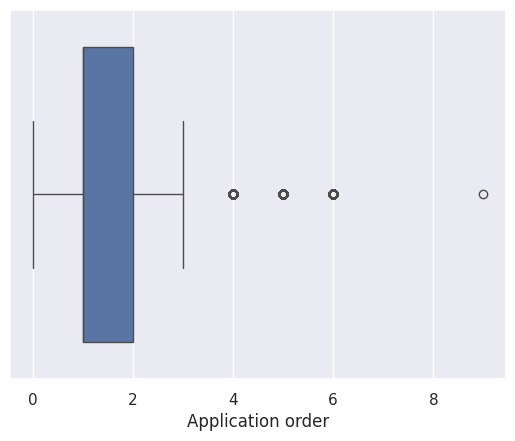

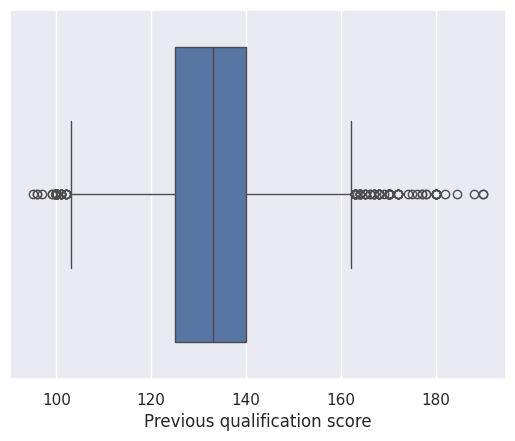

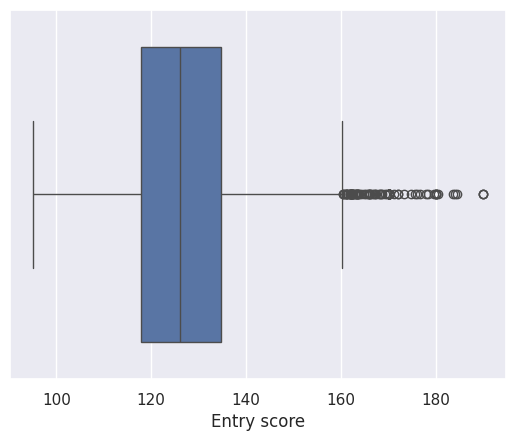

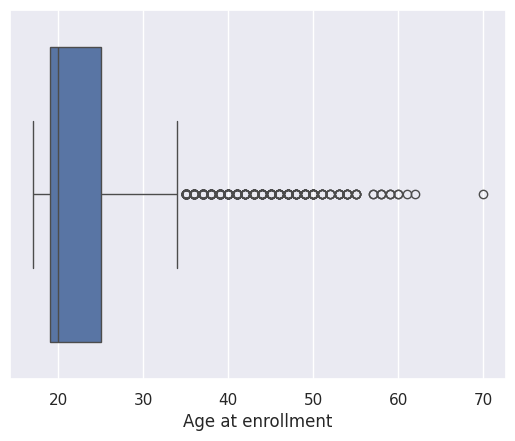

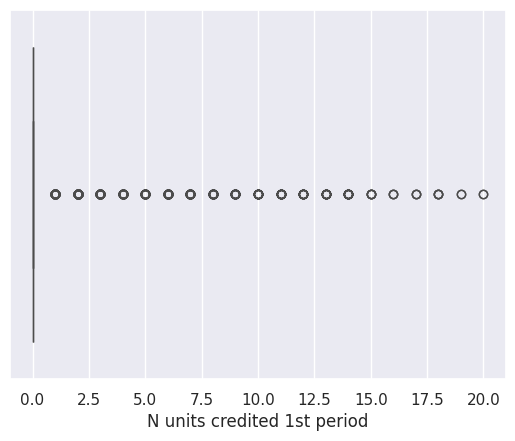

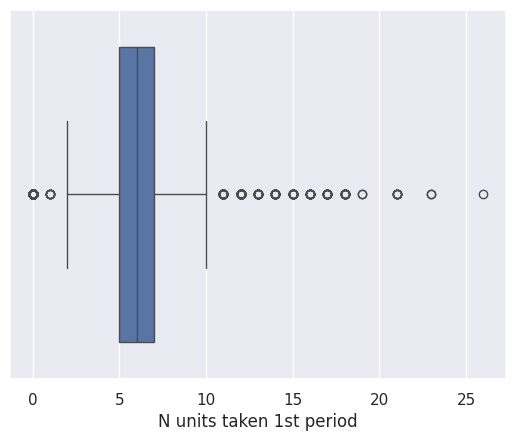

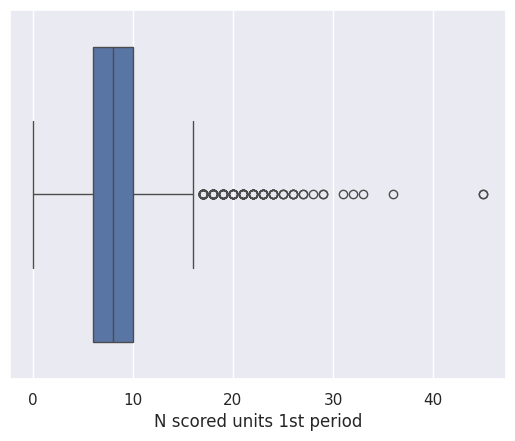

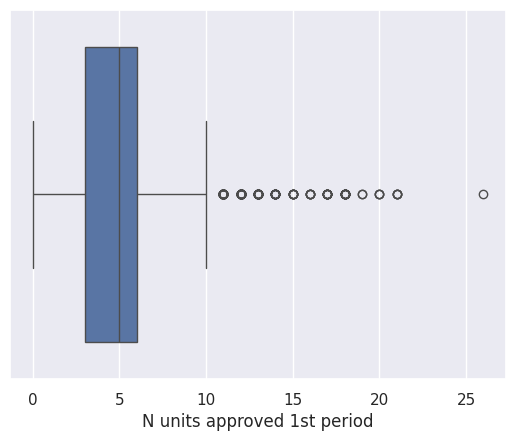

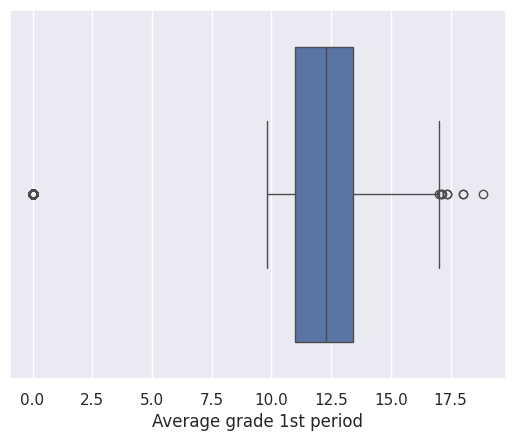

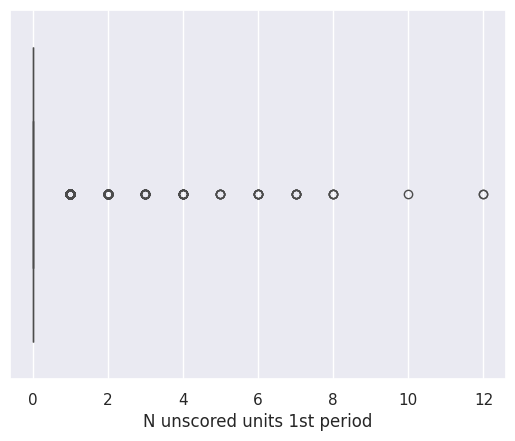

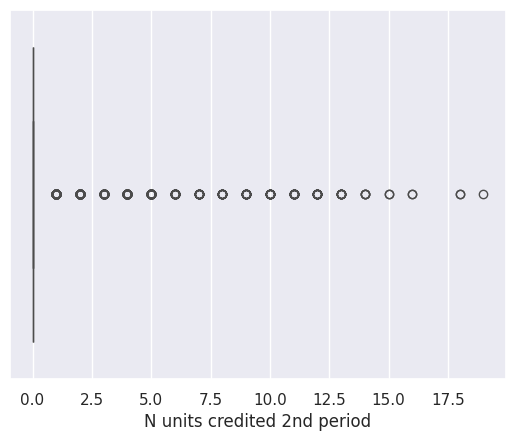

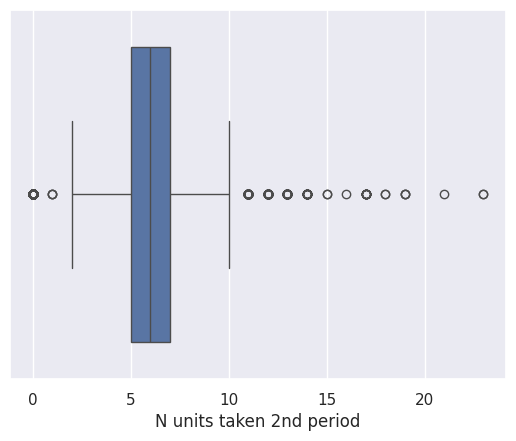

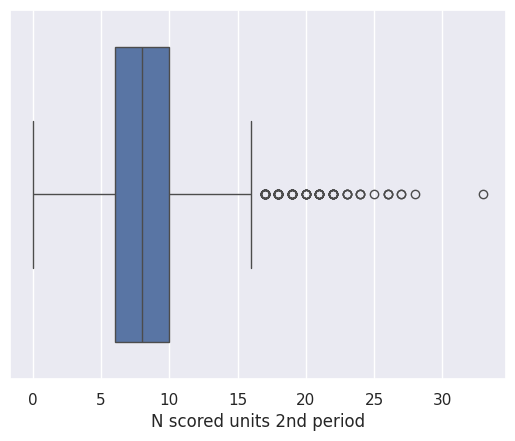

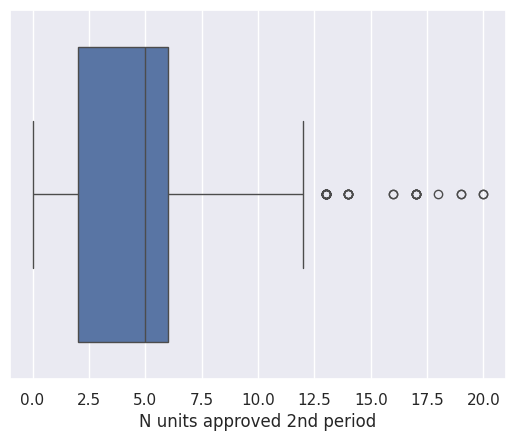

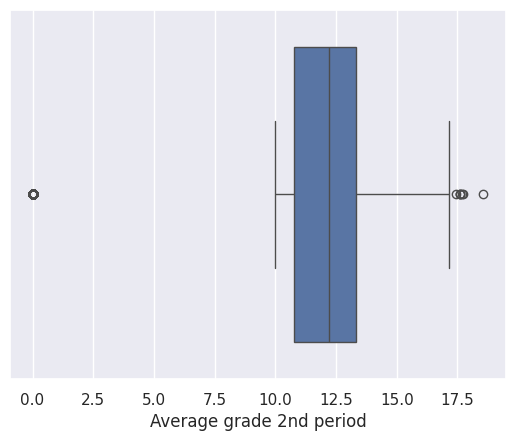

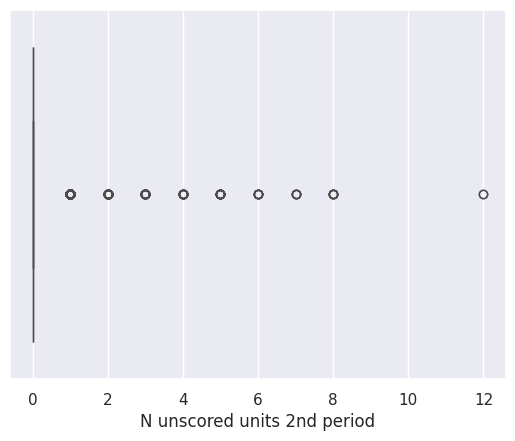

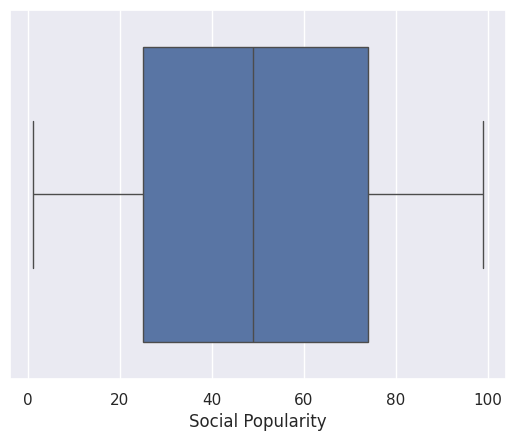

In [31]:
for i, col in enumerate(metricFeatures):
  plt.figure(i)
  sns.boxplot(x=col, data=dataDF)

In [32]:
# mn.matrix(data)

In [33]:
# percentage of empty values in a column
round(dataDF.isnull().sum() / dataDF.shape[0] * 100.00,2)

Marital status                  0.00
Application mode                1.99
Application order               1.99
Course                          0.00
Morning shift participation     1.99
Previous qualification          0.05
Previous qualification score    0.00
Nationality                     0.00
Mother's qualification          2.94
Father's qualification          2.62
Mother's occupation             0.38
Father's occupation             1.20
Entry score                     0.00
Displaced                       1.99
Special needs                   1.99
Debtor                          1.99
Regularized Fees                1.99
Gender_Male                     1.99
External Funding                1.99
Age at enrollment               1.99
International                   1.99
N units credited 1st period     1.99
N units taken 1st period        1.99
N scored units 1st period       1.99
N units approved 1st period     1.99
Average grade 1st period        0.00
N unscored units 1st period     1.99
N

# Preprocessing

In [34]:
def fillNa(data: pd.DataFrame) -> pd.DataFrame:
    """Fill missing values

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # on all of these features, if a value were to be different than 0, then it would not be missing, eg units approved, if the student approved, the value wouldn't be missing
    ifNaThen0: tuple[str,...] = (
        "N units credited 1st period",
        "N unscored units 1st period",
        "N scored units 1st period",
        "N units credited 2nd period",
        "N unscored units 2nd period",
        "N scored units 2nd period"
    )

    # these features are filled differently, basically incoherence checking, but filling the Na on 'N units approved 1st/2nd period' is needed beforehand, more info below
    checkAfterVars: list[list[str]] = [
        ["N units taken 1st period", "N scored units 1st period"],
        ["N units taken 2nd period", "N scored units 2nd period"]
    ]

    for var in metricFeatures:
        if var == (checkAfterVars[0][0] or checkAfterVars[1][0]):
            continue # skip current iteration
        if var in ifNaThen0:
            data[var] = data[var].fillna(0) # fill the ifNaThen0 vars with well, 0s
        else:
            data[var] = data[var].fillna(data[var].median()) # fill everything else with the median of the values of the feature

    # here we use the n units taken features we skipped earlier, a student has to have taken at least the same number of courses as the number of courses they passed
    for varList in checkAfterVars:
        # search for Na values on N units taken and replace by the equivalent value on N units approved
        data.loc[data[varList[0]].isna(), varList[0]] = data[varList[1]]
        # search for values on N units taken that are smaller than the equivalent on N units approved, replace by the equivalent value on N units approved
        data.loc[data[varList[0]] < data[varList[1]], varList[0]] = data[varList[1]]

    for var in boolFeatures:
        if var == "Regularized Fees":
            data[var] = data[var].fillna(1) # if nothing is said about the fees, we can assume they have been paid
        else:
            data[var] = data[var].fillna(0) # here is like the ifNaThen0 situation, if the values were to not be 0, they would have been declared

    return data

In [35]:
def removeOutliers(data: pd.DataFrame) -> pd.DataFrame:
    """Removes outliers and fixes any negative number incoherences on the selected variables from the dataframe

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    toBeTreated: dict[str, dict[str, float | None]] = {
        "Application order": {"lower": 0, "upper": None},
        "Previous qualification score": {"lower": 0, "upper": None},
        "Entry score": {"lower": 0, "upper": None},
        "Age at enrollment": {"lower": 0, "upper": None},
        "N units credited 1st period": {"lower": 0, "upper": 15},
        "N units taken 1st period": {"lower": 0, "upper": 20},
        "N scored units 1st period": {"lower": 0, "upper": 25},
        "N units approved 1st period": {"lower": 0, "upper": 20},
        "Average grade 1st period": {"lower": 0, "upper": None},
        "N unscored units 1st period": {"lower": 0, "upper": None},
        "N units credited 2nd period": {"lower": 0, "upper": 14},
        "N units taken 2nd period": {"lower": 0, "upper": 15},
        "N scored units 2nd period": {"lower": 0, "upper": 25},
        "N units approved 2nd period": {"lower": 0, "upper": 15},
        "Average grade 2nd period": {"lower": 0, "upper": None},
        "N unscored units 2nd period": {"lower": 0, "upper": None},
        "Social Popularity": {"lower": 0, "upper": 100},
    }

    for var in toBeTreated:
        if toBeTreated[var]["lower"] != None:
            toRemove: list = list(data.loc[data[var] < toBeTreated[var]["lower"], var].index)
        if toBeTreated[var]["upper"] != None:
            toRemove.extend(list(data.loc[data[var] > toBeTreated[var]["upper"], var].index))
        data.drop(toRemove, axis=0, inplace=True)

    return data

In [36]:
def groupValues(data: pd.DataFrame) -> pd.DataFrame:
    """replace values on columns that have lots of different values that can be grouped together to reduce the total number of dummies created after

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # for col in ["Mother's qualification",  "Father's qualification", "Previous qualification"]:
    #     data.replace(regex={col: {r"(?i)^no school.*$": '0',
    #                         r"(?i)^[0-4][a-z]{2} grade.*$": '1',
    #                         r"(?i)^[5-9]th grade.*$": '2',
    #                         r"(?i)^1[0-2]th grade.*$": '3',
    #                         r"(?i)^incomplete bachelor.*$": '4',
    #                         r"(?i)^bachelor degree.*$": '5',
    #                         r"(?i)^post-grad.*$": '6',
    #                         r"(?i)^master degree.*$": '7',
    #                         r"(?i)^phd.*$": '8',}}, inplace=True)
    education={
        '12th grade':'Middle',
        '9th grade':'Middle',
        '11th grade':'Middle',
        '12th grade - Technological specialization course':'Middle',
        '10th grade':'Middle',
        '12th grade - Technical-professional course':'Middle',
        '4th grade':'Lower',
        '6th grade':'Lower',
        '8th grade':'Lower',
        '3rd grade':'Lower',
        'Bachelor degree':'Higher',
        'Master degree':'Higher',
        'PhD':'Higher',
        'Post-Graduation':'Higher',
        'Incomplete Bachelor\'s':'Higher',
        'No School': 'None'
      }

    data['Father\'s qualification'].replace(education,inplace=True)
    data['Mother\'s qualification'].replace(education,inplace=True)

    for col in ["Mother's occupation", "Father's occupation"]:
          data.replace(to_replace={col: ["Superior-level Professional", "Intermediate-level Professional", "Politician/CEO", "Teacher", "Information Technology Specialist"]}, value="Professional Fields", inplace=True)
          data.replace(to_replace={col: ["Skilled construction workers", "Assembly Worker", "Factory worker", "Lab Technocian"]}, value="Technical and Skilled Trades", inplace=True)
          data.replace(to_replace={col: ["Administrative Staff", "Office worker", "Accounting operator"]}, value="White collar Jobs", inplace=True)
          data.replace(to_replace={col: ["Restaurant worker", "Personal care worker", "Seller", "Cleaning worker"]}, value="Service Industry", inplace=True)
          data.replace(to_replace={col: ["Private Security", "Armed Forces"]}, value="Security and Armed Forces", inplace=True)
          data.replace(to_replace={col: ["Unskilled Worker", "Other", "Student", "Artist"]}, value="Recreational or unskilled", inplace=True)
          data.replace(to_replace={col: ["Engineer", "Scientist", "Health professional"]}, value="STEM Jobs", inplace=True)

    data.replace(to_replace={"Marital status": {
        'single':'alone',
        'divorced':'alone',
        'legally separated':'alone',
        'widower':'alone',
        'married':'together',
        'facto union':'together'
    }}, inplace=True)

    return data

In [37]:
def getDummies(data: pd.DataFrame) -> pd.DataFrame:
    """get dummies

    Args:
        train (`pd.DataFrame`): Train dataframe to be treated

    Returns:
        `pd.DataFrame` : treated dataframe
    """

    data = pd.get_dummies(data=data, prefix_sep="-", dummy_na=True, drop_first=False)

    return data

In [38]:
def scaleData(data: pd.DataFrame) -> pd.DataFrame:
    """Tranforms the values in the dataframe to fit in a scale of 0 to 1

    Args:
        train (pd.DataFrame): Unscaled train dataframe

    Returns:
        pd.DataFrame: Scaled dataframe
    """

    scaler = MinMaxScaler()
    scaler.fit(data)

    data = pd.DataFrame(scaler.transform(data), columns = data.columns, index = data.index)

    return data

In [39]:
def encodeSuccess(successData: pd.DataFrame) -> pd.DataFrame:
    """Replace string values on success by integers

    Args:
        successData (pd.DataFrame): Untreated dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """
    successData.replace({'Success': {"Gave up": 0, "Holding on": 1, "Succeeded": 2}}, inplace=True)

    return successData

In [40]:
def prepData(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Runs the preprocessing steps on the dataframe

    Args:
        data (pd.DataFrame): Un-preprocessed data dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """

    data = encodeSuccess(data)
    data = fillNa(data)
    data = removeOutliers(data)
    data = groupValues(data)
    dataAcademic: pd.DataFrame = data[academicFeatures]
    dataDemographic: pd.DataFrame = data[demographicFeatures]
    dataAcademic = getDummies(dataAcademic)
    dataDemographic = getDummies(dataDemographic)
    dataAcademic = scaleData(dataAcademic)
    dataDemographic = scaleData(dataDemographic)
    data = getDummies(data)
    data = scaleData(data)

    return data, dataAcademic, dataDemographic

# Feature Selection

In [41]:
def pairPlots(data: pd.DataFrame,fileName: str) -> None:
    sns.pairplot(data.sample(1000)).savefig(f"./output/{fileName}.png")

# Feature engineering

In [54]:
data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

# Clustering

In [43]:
def getSom(data) -> tuple[sompy.sompy.SOM, int, int, np.float32]:
    """_summary_

    Args:
        data (_type_): _description_

    Returns:
        tuple[sompy.sompy.SOM, int, int, np.float32]: _description_
    """
    df_som = np.float32(data.values)
    rows = 25
    cols = 25
    mapsize: list[int] = [rows, cols]

    som: sompy.sompy.SOM = SOMFactory().build(df_som, mapsize, mask=None,
                            mapshape='planar', # 2Dimensions
                            lattice='rect', # topology: 'rect' or 'hexa'
                            normalization='var', # standardize the variables
                            initialization='pca', # initialization of the weights: 'pca' or 'random'
                            neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                            training='batch') # training mode: 'seq' or 'batch'

    return som,rows,cols,df_som

In [44]:
def getGraphs(data: pd.DataFrame, somDetails: tuple[sompy.sompy.SOM, int, int, np.float32],nClusters) -> None:
    """_summary_

    Args:
        data (pd.DataFrame): _description_
        somDetails (tuple[sompy.sompy.SOM, int, int, np.float32]): _description_
    """
    somDetails[0].train(n_job=1, verbose=None, train_rough_len=3, train_finetune_len=5)

    u = sompy.umatrix.UMatrixView(somDetails[1], height=somDetails[2], title='U-matrix', show_axis=True, text_size=8, show_text=True)

    #This is the Umat value
    UMAT  = u.build_u_matrix(somDetails[0], distance=1, row_normalized=False)

    #Here you have Umatrix plus its render
    _, umat = u.show(somDetails[0], distance=1, row_normalized=True, contour=True, blob=False)

    somDetails[0].component_names = data.columns
    comp_planes = sompy.mapview.View2DPacked(somDetails[1], somDetails[2], 'Component Planes', text_size=8)
    comp_planes.show(somDetails[0], what='codebook', which_dim='all', col_sz=8)

    cl=somDetails[0].cluster(n_clusters=nClusters)
    labels = getattr(somDetails[0], 'cluster_labels')
    h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
    h.show(somDetails[0])
    bmus = somDetails[0].project_data(somDetails[3])
    data['bmu'] = bmus
    data['label'] = labels[data['bmu']]

    # clusteringResult: pd.DataFrame = data.groupby(['label']).describe().T
    return data

In [45]:
def clustering(data: pd.DataFrame, somDetails: tuple[sompy.sompy.SOM, int, int, np.float32], nClusters: int = 4) -> pd.DataFrame:
    """_summary_

    Args:
        data (pd.DataFrame): _description_
        somDetails (tuple[sompy.sompy.SOM, int, int, np.float32]): _description_
        clusters (int, optional): _description_. Defaults to 4.
    """
    somDetails[0].cluster(n_clusters=nClusters)
    labels = getattr(somDetails[0], 'cluster_labels')
    h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
    h.show(somDetails[0])
    bmus = somDetails[0].project_data(somDetails[3])
    data['bmu'] = bmus
    data['label'] = labels[data['bmu']]

    clusteringResult: pd.DataFrame = data.groupby(['label']).describe().T

    return clusteringResult

In [46]:
def somWrap(data, getClusters: bool = True, nClusters: int = 4) -> pd.DataFrame | None:
    somDetails: tuple[sompy.sompy.SOM, int, int, np.float32] = getSom(data)
    return getGraphs(data, somDetails,nClusters)
    # if getClusters:
    #     return clustering(data, somDetails, nClusters)

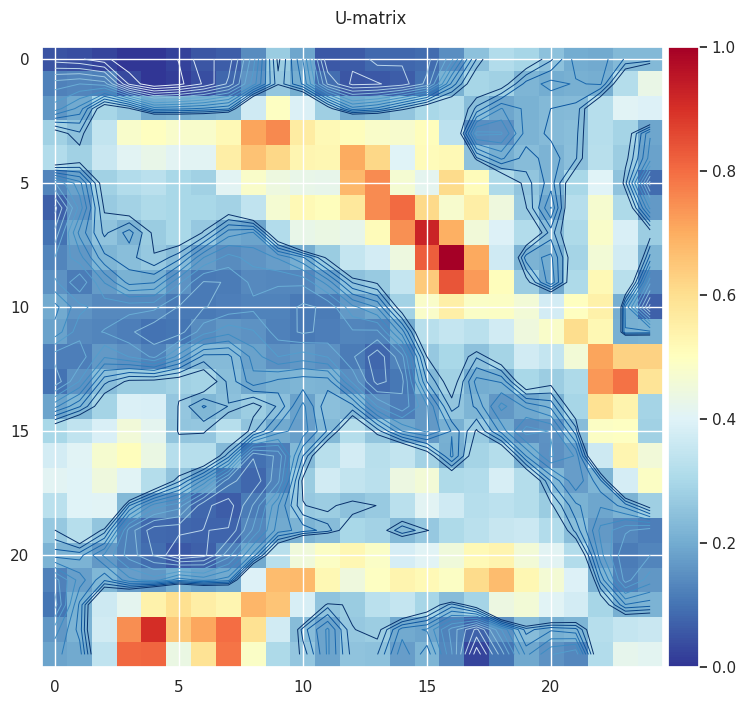

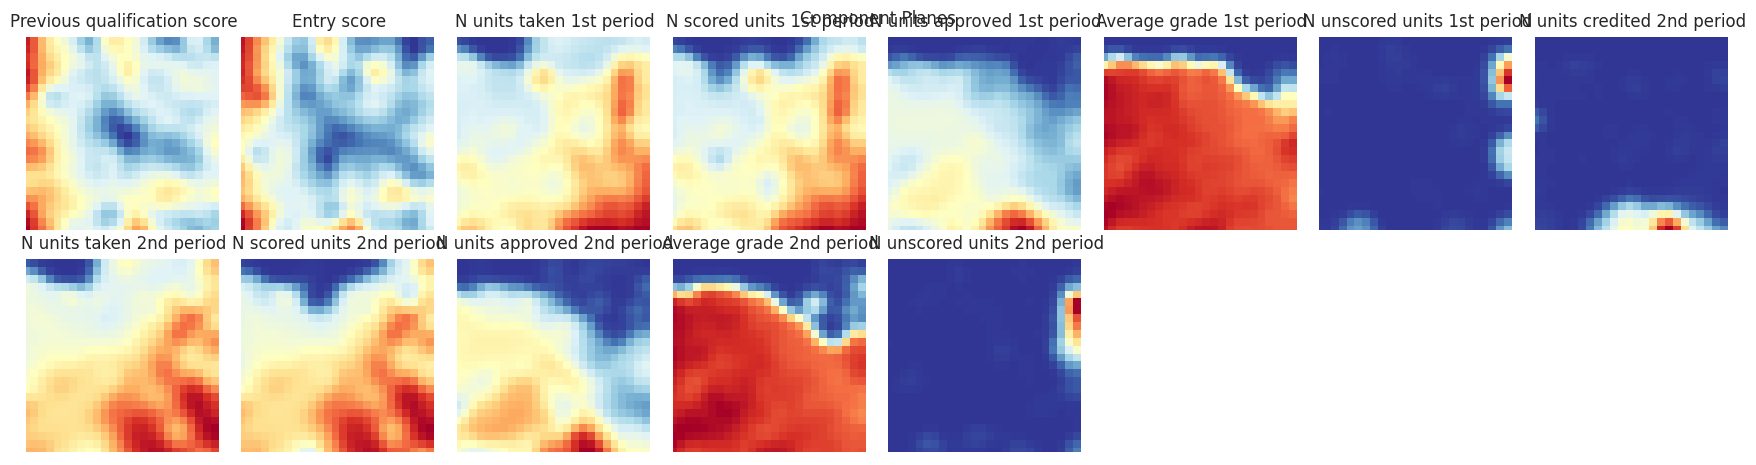

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Previous qualification score  Entry score  N units taken 1st period  \
Userid                                                                        
699                         0.473684     0.473684                      0.60   
456                         0.368421     0.208421                      0.45   
647                         0.421053     0.273684                      0.55   
383                         0.421053     0.273684                      0.65   
1217                        0.305263     0.238947                      0.50   
...                              ...          ...                       ...   
4144                        0.368421     0.192632                      0.75   
2761                        0.578947     0.336842                      0.40   
4410                        0.473684     0.291579                      0.25   
259                         0.273684     0.251579                      0.40   
1292                        0.505263     0.473684                      0.40   

        N scored units 1st period  N units approved 1st period  \
Userid                                                           
699                          0.60                     0.277778   
456                          0.45                     0.333333   
647                          0.55                     0.277778   
383                          0.65                     0.166667   
1217                         0.50                     0.277778   
...                           ...                          ...   
4144                         0.75                     0.277778   
2761                         0.40                     0.333333   
4410                         0.25                     0.277778   
259                          0.40                     0.277778   
1292                         0.40                     0.388889   

        Average grade 1st period  N unscored units 1st period  \
Userid                                                          
699                     0.667550                          0.0   
456                     0.591611                          0.0   
647                     0.593377                          0.0   
383                     0.547461                          0.0   
1217                    0.635762                          0.0   
...                          ...                          ...   
4144                    0.656954                          0.0   
2761                    0.691214                          0.0   
4410                    0.773510                          0.0   
259                     0.618102                          0.0   
1292                    0.756859                          0.0   

        N units credited 2nd period  N units taken 2nd period  \
Userid                                                          
699                        0.000000                  0.733333   
456                        0.076923                  1.000000   
647                        0.000000                  1.000000   
383                        0.000000                  0.800000   
1217                       0.000000                  0.733333   
...                             ...                       ...   
4144                       0.000000                  0.933333   
2761                       0.153846                  0.666667   
4410                       0.000000                  0.400000   
259                        0.000000                  0.600000   
1292                       0.000000                  0.533333   

        N scored units 2nd period  N units approved 2nd period  \
Userid                                                           
699                      0.733333                     0.428571   
456                      1.000000                     0.142857   
647                      1.000000                     0.071429   
383                      0.800000                     0.214286   
1217                     0.733333

In [47]:
somWrap(prepData(dataDF)[1],getClusters=True,nClusters=3)

# Model

In [161]:
def runAll(data: pd.DataFrame, getPairPlot: bool = False, getClusters: bool = True, nClusters: int = 4) -> None:
    """Runs the algorithm

    Args:
        X_train (pd.DataFrame): Raw/Un-preprocessed X_train dataframe
        Y_train (pd.DataFrame): Raw/Un-preprocessed Y_train dataframe
        X_test (pd.DataFrame): Raw/Un-preprocessed X_test dataframe
        split (bool, optional): Whether or not to split the dataframes using train_test_split, used for model assessment. Defaults to False.
    """

    dataDF, dataAcademic, dataDemographic = prepData(data)

    if getPairPlot:
        pairPlots(dataAcademic, "AcademicPairPlot")
        pairPlots(dataDemographic, "DemographicPairPlot")

    somWrap(dataAcademic, getClusters, nClusters)
    somWrap(dataDemographic, getClusters, nClusters)

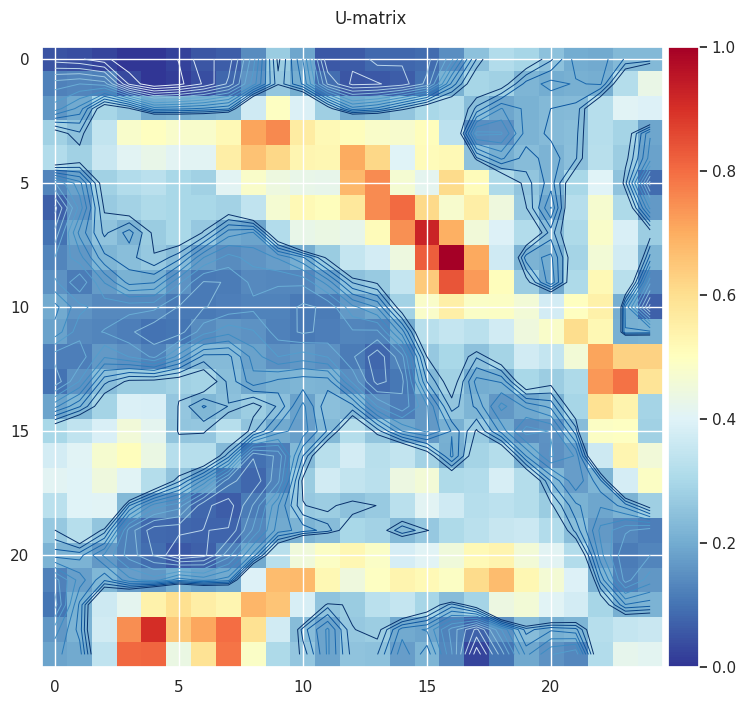

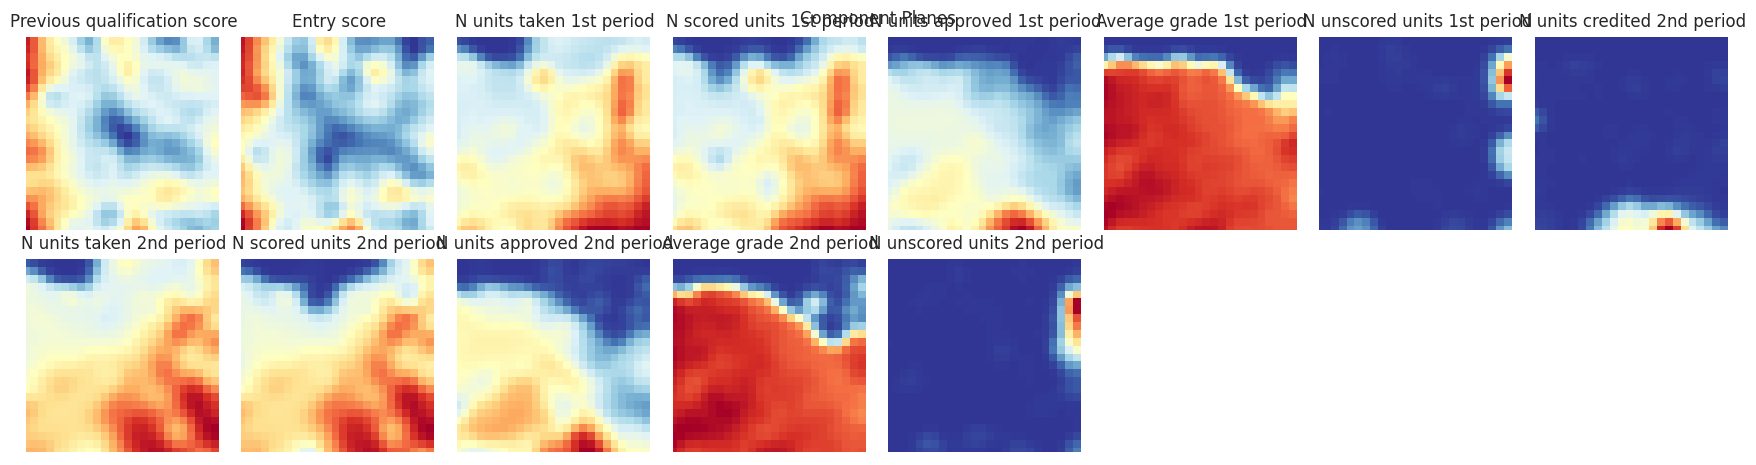

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


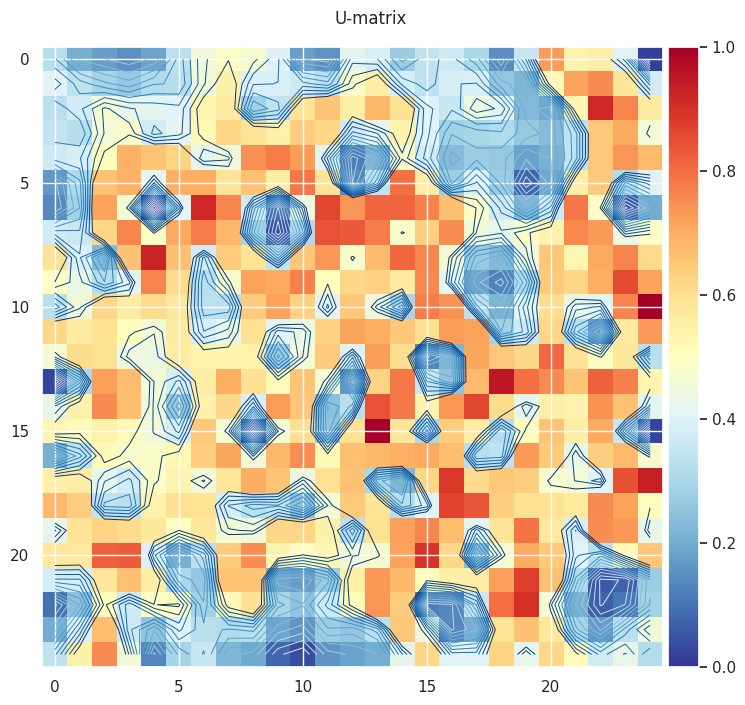

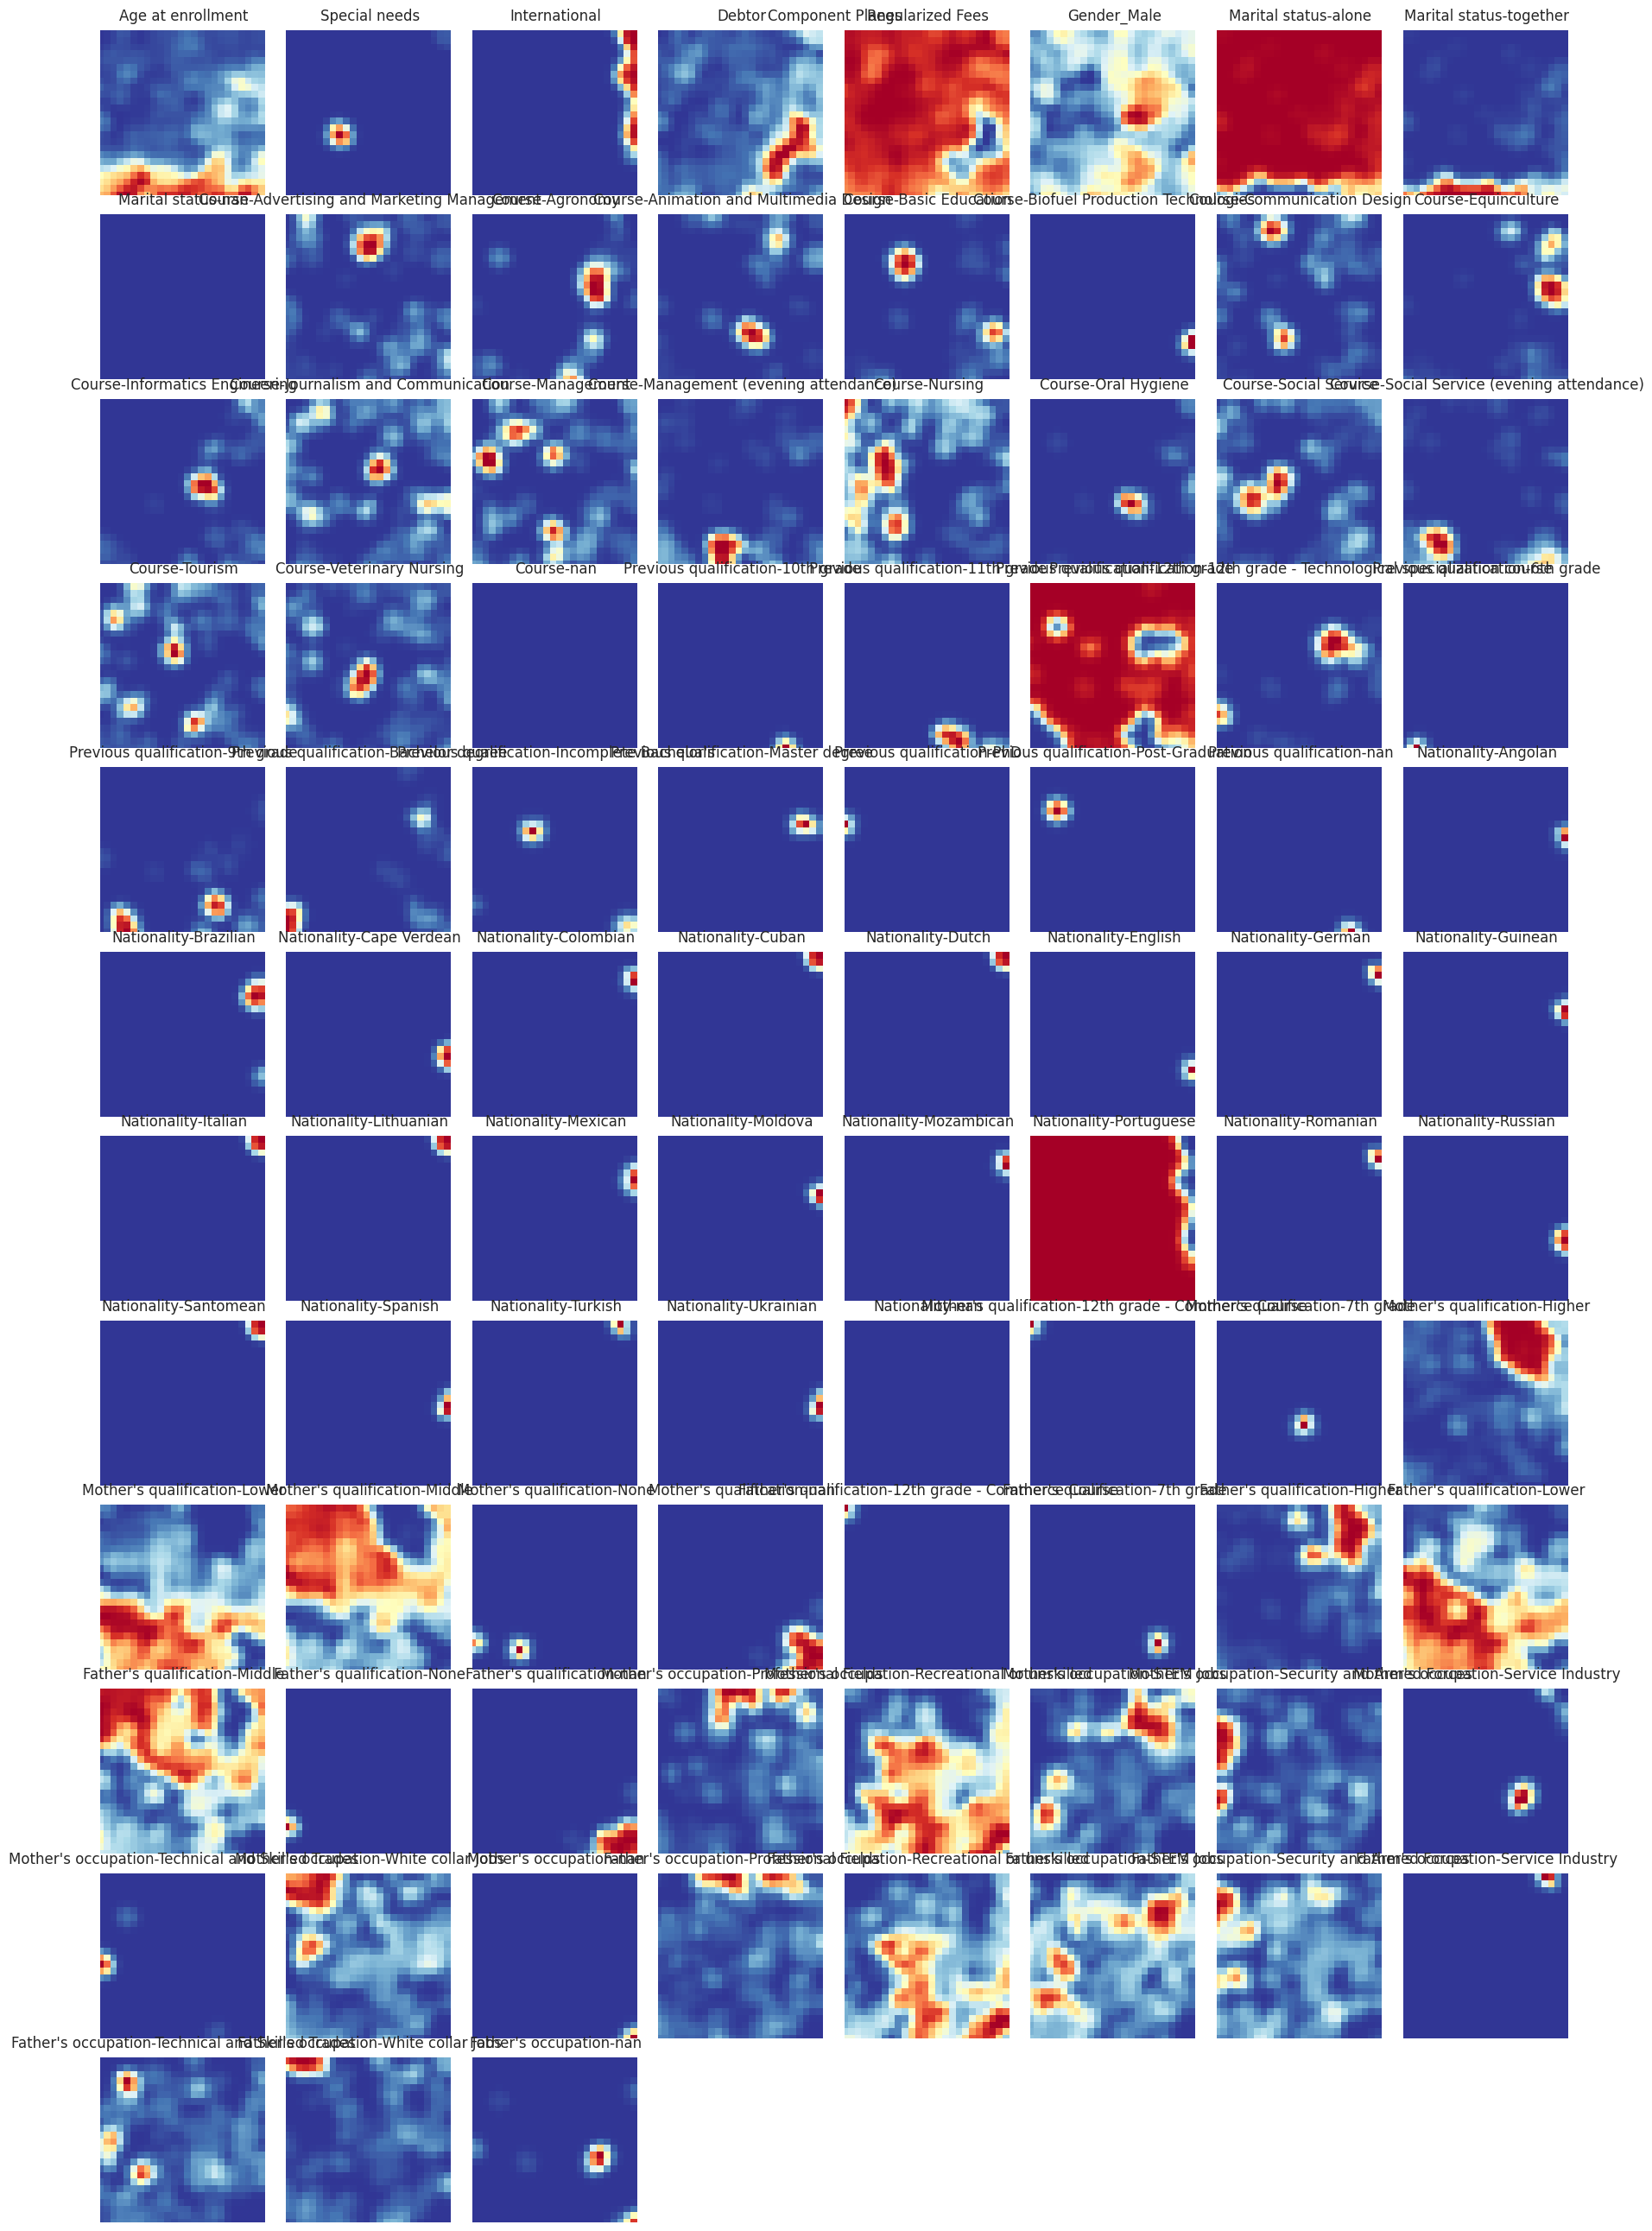

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [162]:
runAll(dataDF)

In [66]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        color = sns.color_palette('Dark2')

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=color, ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=16, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=16)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=16)


    plt.subplots_adjust(hspace=0.4, top=0.90, bottom = 0.2)
    plt.suptitle("Cluster Profiling", fontsize=23)
    plt.show()

# SOM function

In [110]:
def somFunc(df_som,rows,cols,umat=False,componentPlanes=False,componentColumns=[]):
  mapsize=[rows,cols]
  som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'
  som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

  if umat == True:
    u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

  #This is the Umat value
  UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

  #Here you have Umatrix plus its render
  _, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

  if componentPlanes == True:
    som.component_names = componentColumns
    comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
    comp_planes.show(som, what='codebook', which_dim='all', col_sz=8)

  return som

#AcademData

In [118]:
academicData=['Entry score','Average scored units','Average grades','Average units taken','Average units approved','Average units credited','Average unscored units','Success']

In [119]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic = scaleData(dataAcademicDF)
data = getDummies(data)
data = scaleData(data)
dataAcademicDF=scaleData(dataAcademicDF)

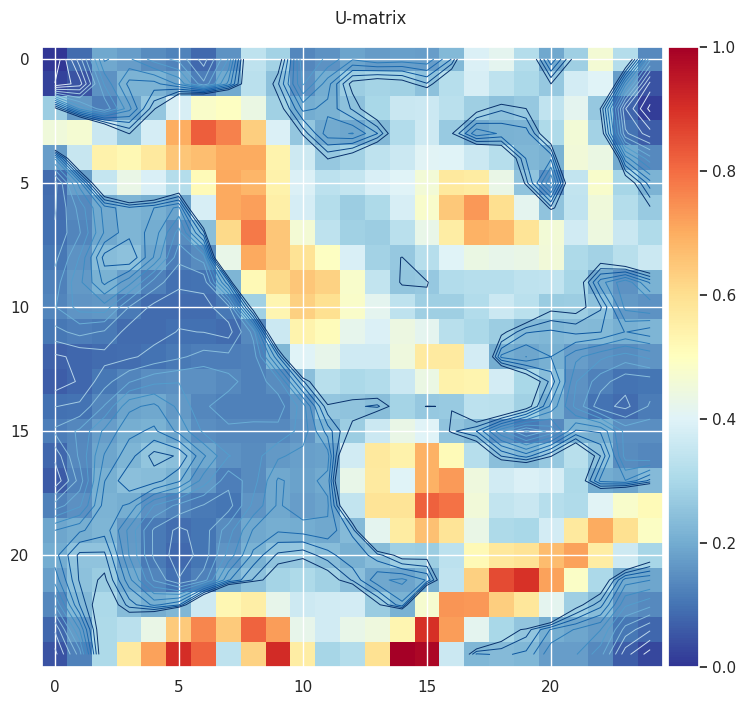

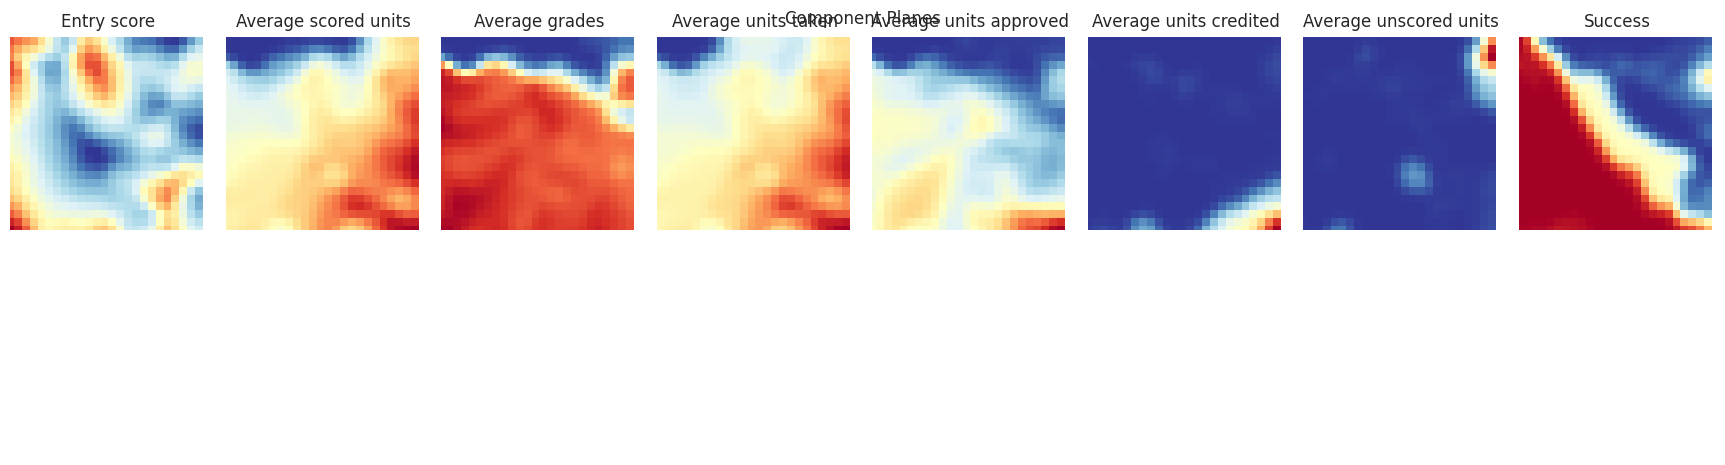

In [120]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [121]:
# cl = som.cluster(n_clusters=4)
bmus = som.project_data(dataAcademic)
som.cluster(n_clusters=3)
labels = getattr(som, 'cluster_labels')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


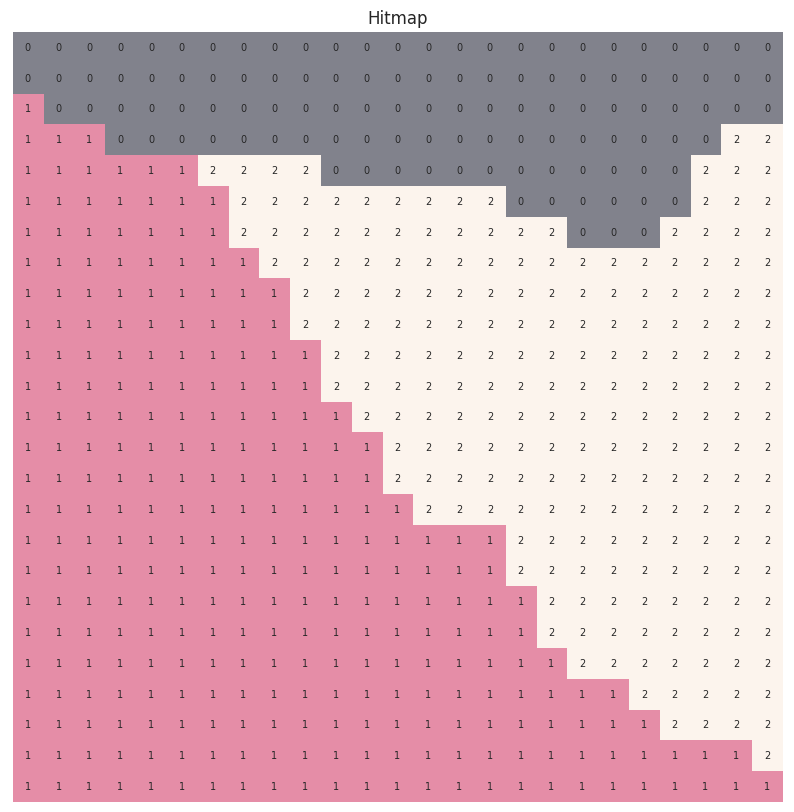

In [122]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [123]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

<ipython-input-66-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


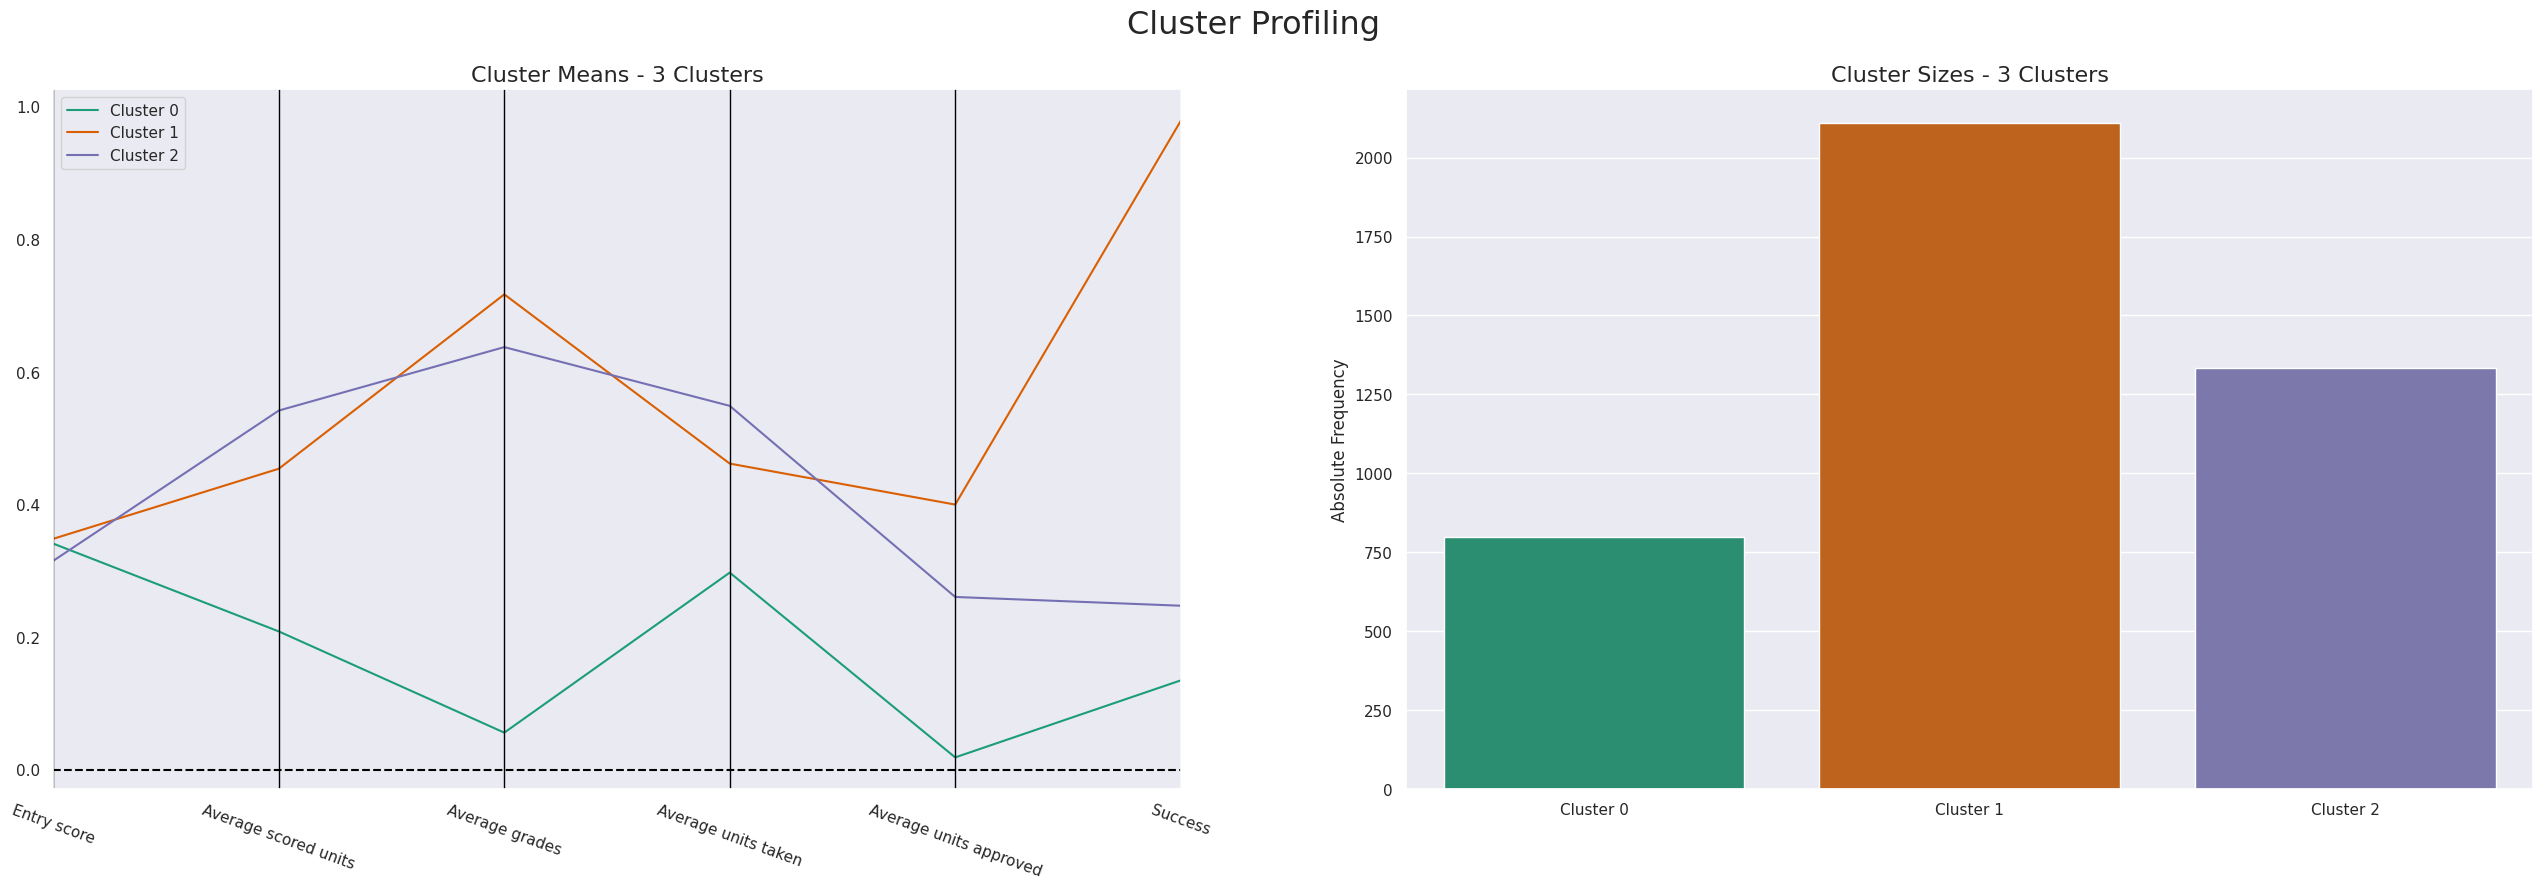

In [135]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

In [79]:
from tqdm import tqdm

  0%|          | 0/6 [00:00<?, ?it/s]

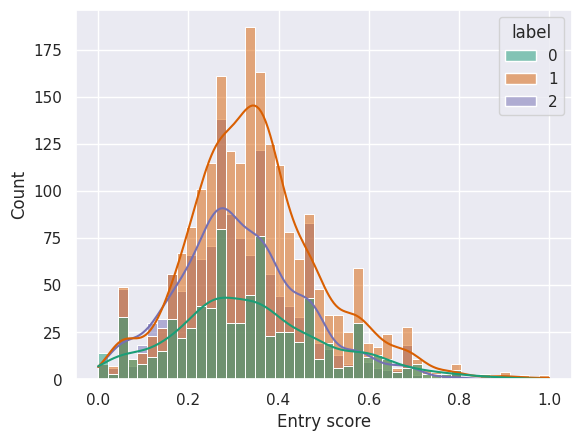

 17%|█▋        | 1/6 [00:00<00:03,  1.57it/s]

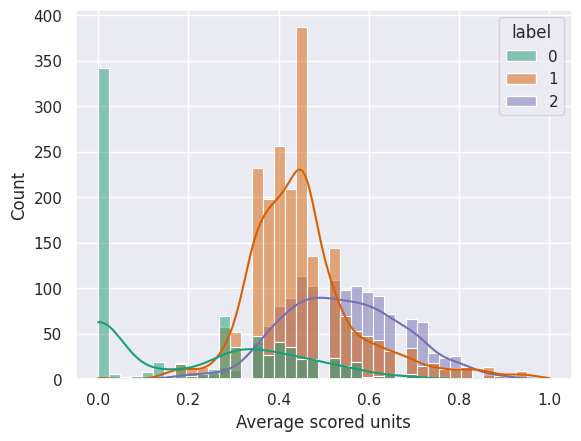

 33%|███▎      | 2/6 [00:01<00:02,  1.56it/s]

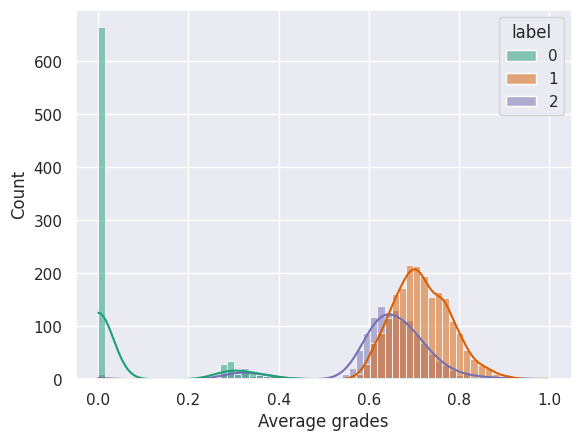

 50%|█████     | 3/6 [00:02<00:02,  1.45it/s]

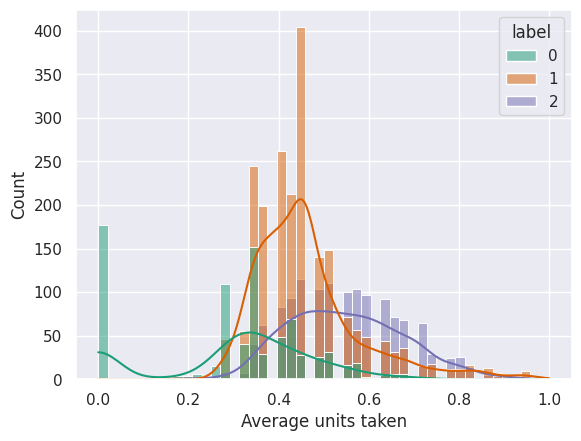

 67%|██████▋   | 4/6 [00:02<00:01,  1.43it/s]

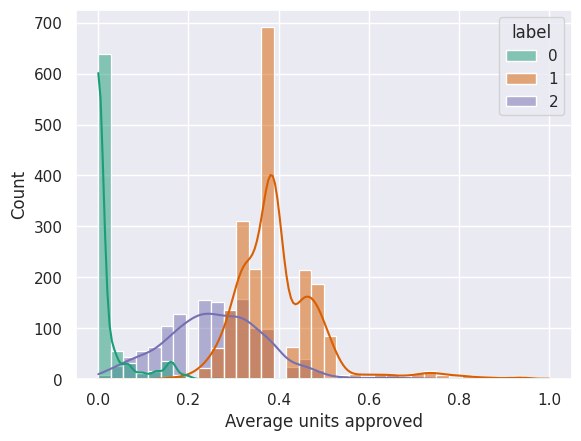

 83%|████████▎ | 5/6 [00:04<00:00,  1.08it/s]

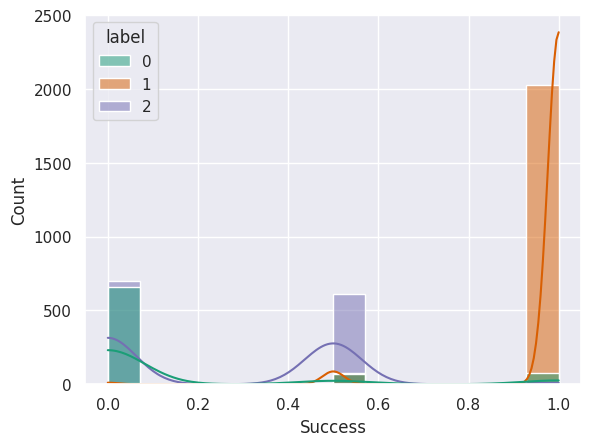

100%|██████████| 6/6 [00:04<00:00,  1.24it/s]


In [136]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [130]:
academicData.remove('Average unscored units')
academicData.remove('Average units credited')

ValueError: list.remove(x): x not in list

In [131]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic = scaleData(dataAcademicDF)
data = getDummies(data)
data = scaleData(data)
dataAcademicDF=scaleData(dataAcademicDF)

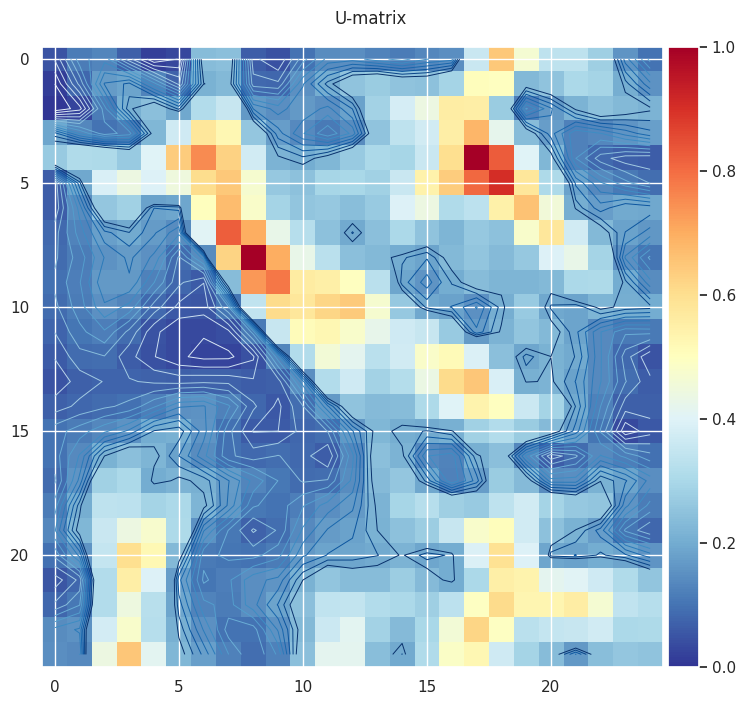

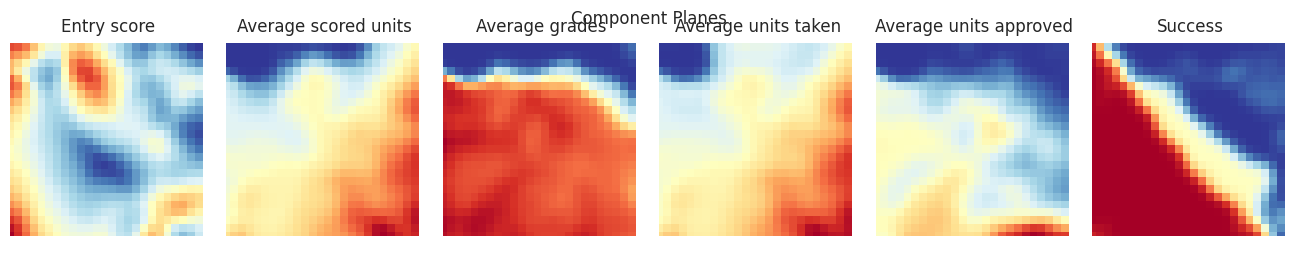

In [132]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [134]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

<ipython-input-66-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


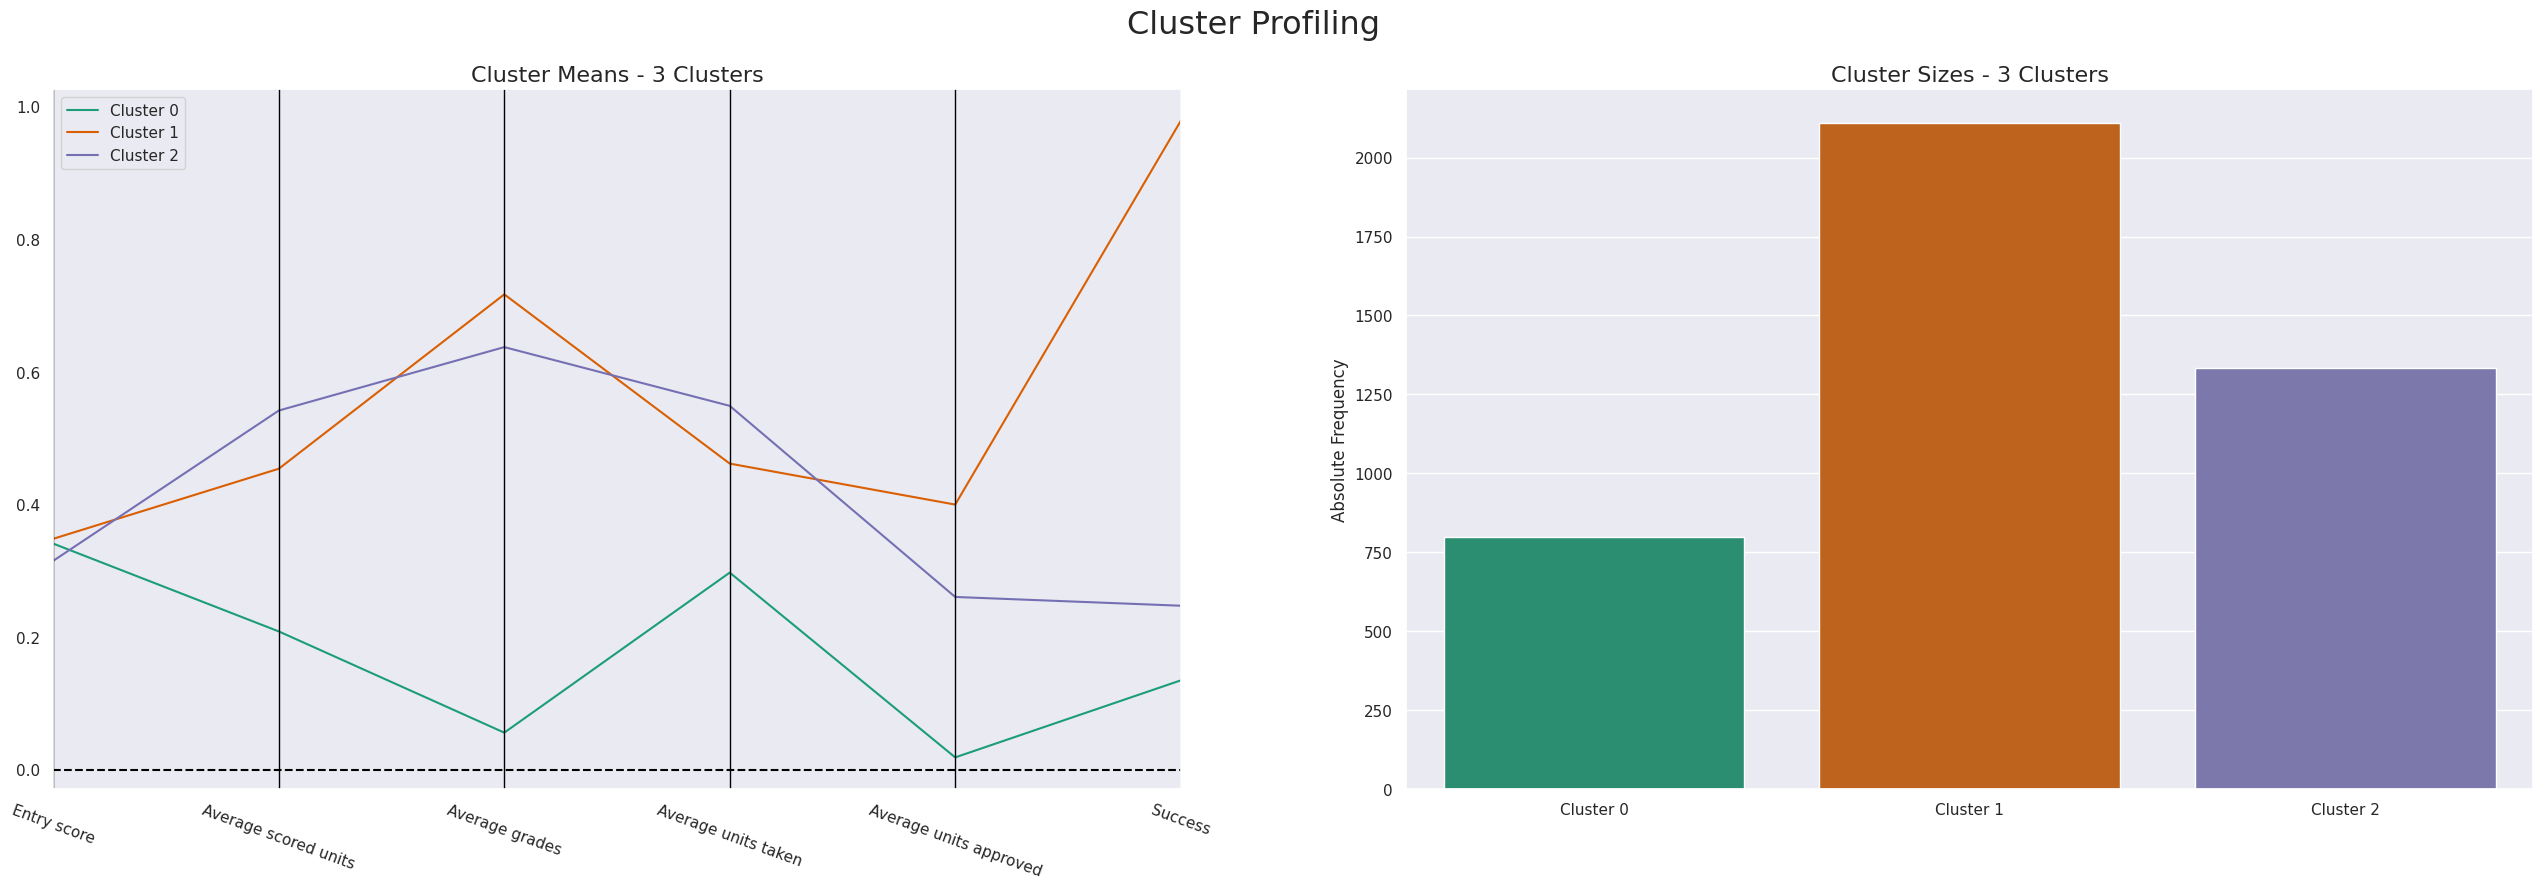

In [ ]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/6 [00:00<?, ?it/s]

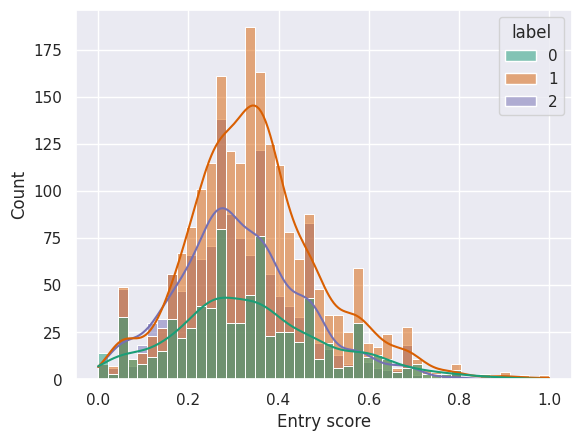

 17%|█▋        | 1/6 [00:00<00:03,  1.57it/s]

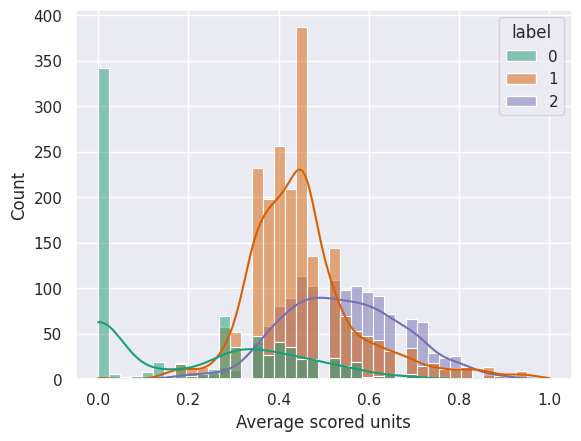

 33%|███▎      | 2/6 [00:01<00:02,  1.56it/s]

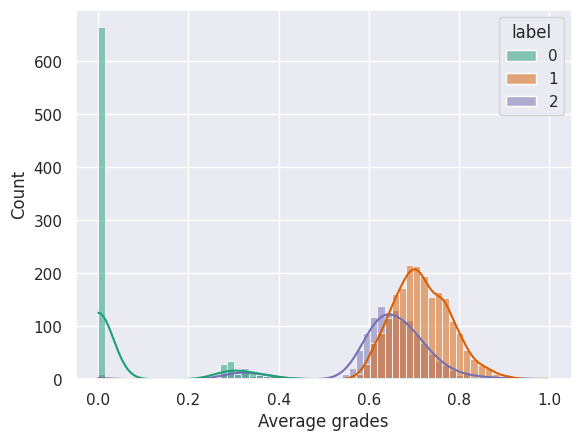

 50%|█████     | 3/6 [00:02<00:02,  1.45it/s]

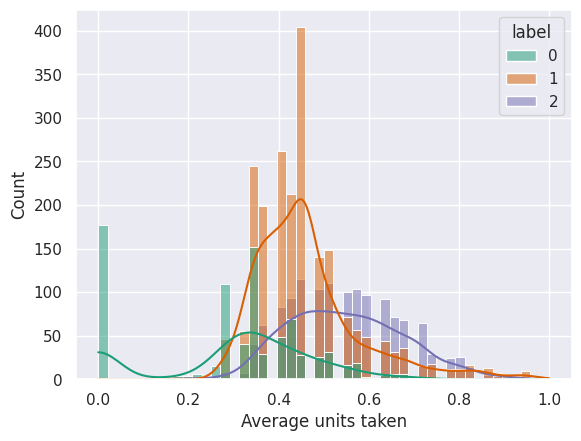

 67%|██████▋   | 4/6 [00:02<00:01,  1.43it/s]

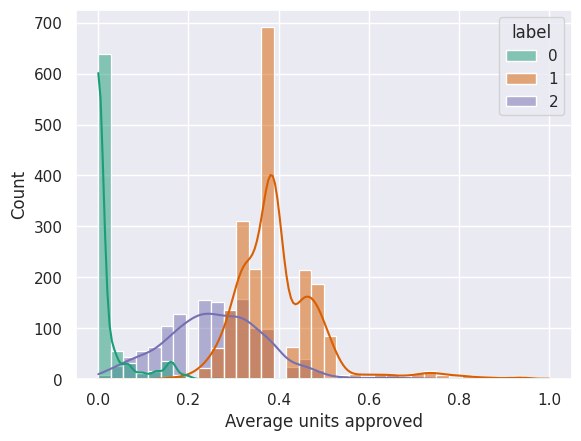

 83%|████████▎ | 5/6 [00:04<00:00,  1.08it/s]

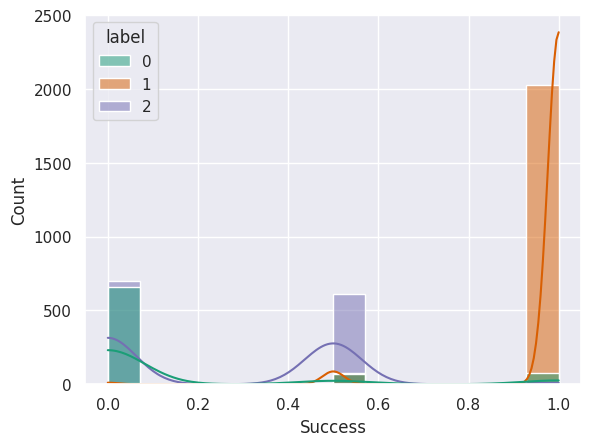

100%|██████████| 6/6 [00:04<00:00,  1.24it/s]


In [ ]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [137]:
academicResults[academicData+['label']].groupby(['label']).describe().T

label                                  0            1            2
Entry score            count  799.000000  2111.000000  1335.000000
                       mean   127.372841   128.076741   124.930337
                       std     16.517472    14.026042    13.555729
                       min     95.000000    95.000000    95.000000
                       25%    116.950000   119.200000   116.150000
                       50%    126.100000   127.000000   123.500000
                       75%    137.550000   135.450000   132.450000
                       max    183.500000   190.000000   190.000000
Average scored units   count  799.000000  2111.000000  1335.000000
                       mean     3.647059     7.941971     9.477528
                       std      3.634624     2.204223     2.350050
                       min      0.000000     0.000000     0.000000
                       25%      0.000000     6.500000     8.000000
                       50%      3.500000     7.500000     9.500000
                       75%      6.500000     8.500000    11.000000
                       max     12.500000    17.500000    16.500000
Average grades         count  799.000000  2111.000000  1335.000000
                       mean     1.019569    13.105347    11.650898
                       std      2.332589     1.242765     2.154187
                       min      0.000000     0.000000     0.000000
                       25%      0.000000    12.300000    11.184524
                       50%      0.000000    13.011905    11.900000
                       75%      0.000000    13.916667    12.750000
                       max     13.670000    18.283654    17.166667
Average units taken    count  799.000000  2111.000000  1335.000000
                       mean     5.200250     8.076978     9.600749
                       std      3.174925     2.092046     2.217249
                       min      0.000000     0.000000     3.000000
                       25%      4.500000     6.500000     8.000000
                       50%      6.000000     8.000000     9.500000
                       75%      7.500000     9.000000    11.000000
                       max     12.500000    17.500000    16.500000
Average units approved count  799.000000  2111.000000  1335.000000
                       mean     0.285982     6.195879     4.036330
                       std      0.695405     1.584171     1.744876
                       min      0.000000     0.000000     0.000000
                       25%      0.000000     5.000000     3.000000
                       50%      0.000000     6.000000     4.000000
                       75%      0.000000     7.000000     5.000000
                       max      4.000000    15.500000    11.500000
Success                count  799.000000  2111.000000  1335.000000
                       mean     0.269086     1.956419     0.494382
                       std      0.618376     0.224126     0.533515
                       min      0.000000     0.000000     0.000000
                       25%      0.000000     2.000000     0.000000
                       50%      0.000000     2.000000     0.000000
                       75%      0.000000     2.000000     1.000000
                       max      2.000000     2.000000     2.000000

# Demographic data

In [241]:
# Index(['Application mode', 'Application order', 'Morning shift participation',
#        'Previous qualification score', 'Entry score', 'Displaced',
#        'Special needs', 'Debtor', 'Regularized Fees', 'Gender_Male',
#        'External Funding', 'Age at enrollment', 'International',
#        'N units credited 1st period', 'N units taken 1st period',
#        'N scored units 1st period', 'N units approved 1st period',
#        'Average grade 1st period', 'N unscored units 1st period',
#        'N units credited 2nd period', 'N units taken 2nd period',
#        'N scored units 2nd period', 'N units approved 2nd period',
#        'Average grade 2nd period', 'N unscored units 2nd period',
#        'Social Popularity', 'Marital status_alone', 'Marital status_together',
#        'Course_Business and Social Services', 'Course_Humanities',
#        'Course_STEM', 'Previous qualification_Higher',
#        'Previous qualification_Lower', 'Previous qualification_Middle',
#        'Mother's qualification_12th grade - Commerce Course',
#        'Mother's qualification_7th grade', 'Mother's qualification_Higher',
#        'Mother's qualification_Lower', 'Mother's qualification_Middle',
#        'Mother's qualification_None',
#        'Father's qualification_12th grade - Commerce Course',
#        'Father's qualification_7th grade', 'Father's qualification_Higher',
#        'Father's qualification_Lower', 'Father's qualification_Middle',
#        'Father's qualification_None',
#        'Mother's occupation_Administrative Staff',
#        'Mother's occupation_Armed Forces',
#        'Mother's occupation_Assembly Worker', 'Mother's occupation_Engineer',
#        'Mother's occupation_Other', 'Mother's occupation_Politician/CEO',
#        'Mother's occupation_Private Security', 'Mother's occupation_Scientist',
#        'Mother's occupation_Student',
#        'Mother's occupation_Superior-level Professional',
#        'Mother's occupation_Unskilled Worker',
#        'Father's occupation_Administrative Staff',
#        'Father's occupation_Armed Forces',
#        'Father's occupation_Assembly Worker', 'Father's occupation_Engineer',
#        'Father's occupation_Other', 'Father's occupation_Politician/CEO',
#        'Father's occupation_Private Security', 'Father's occupation_Scientist',
#        'Father's occupation_Student',
#        'Father's occupation_Superior-level Professional',
#        'Father's occupation_Unskilled Worker', 'Average grades',
#        'Average units taken', 'Average scored units', 'Average units approved',
#        'Average units credited', 'Average unscored units', 'Unit load'],
#       dtype='object')

In [145]:
# demographicData=['Mother\'s qualification','Father\'s qualification']
# demographicData=['Mother\'s occupation','Father\'s occupation']
# demographicData=['Age at enrollment','Marital status','Special needs']


demographicData: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']



In [146]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataDemographicDF = data[demographicData]
dataDemographicDF = getDummies(dataDemographicDF)
dataDemographicDF = scaleData(dataDemographicDF)
data = getDummies(data)
data = scaleData(data)

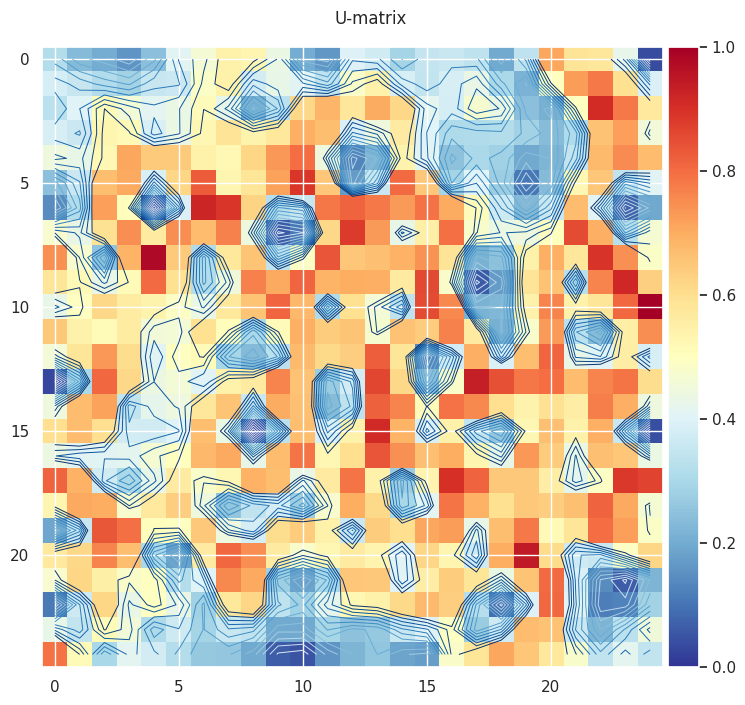

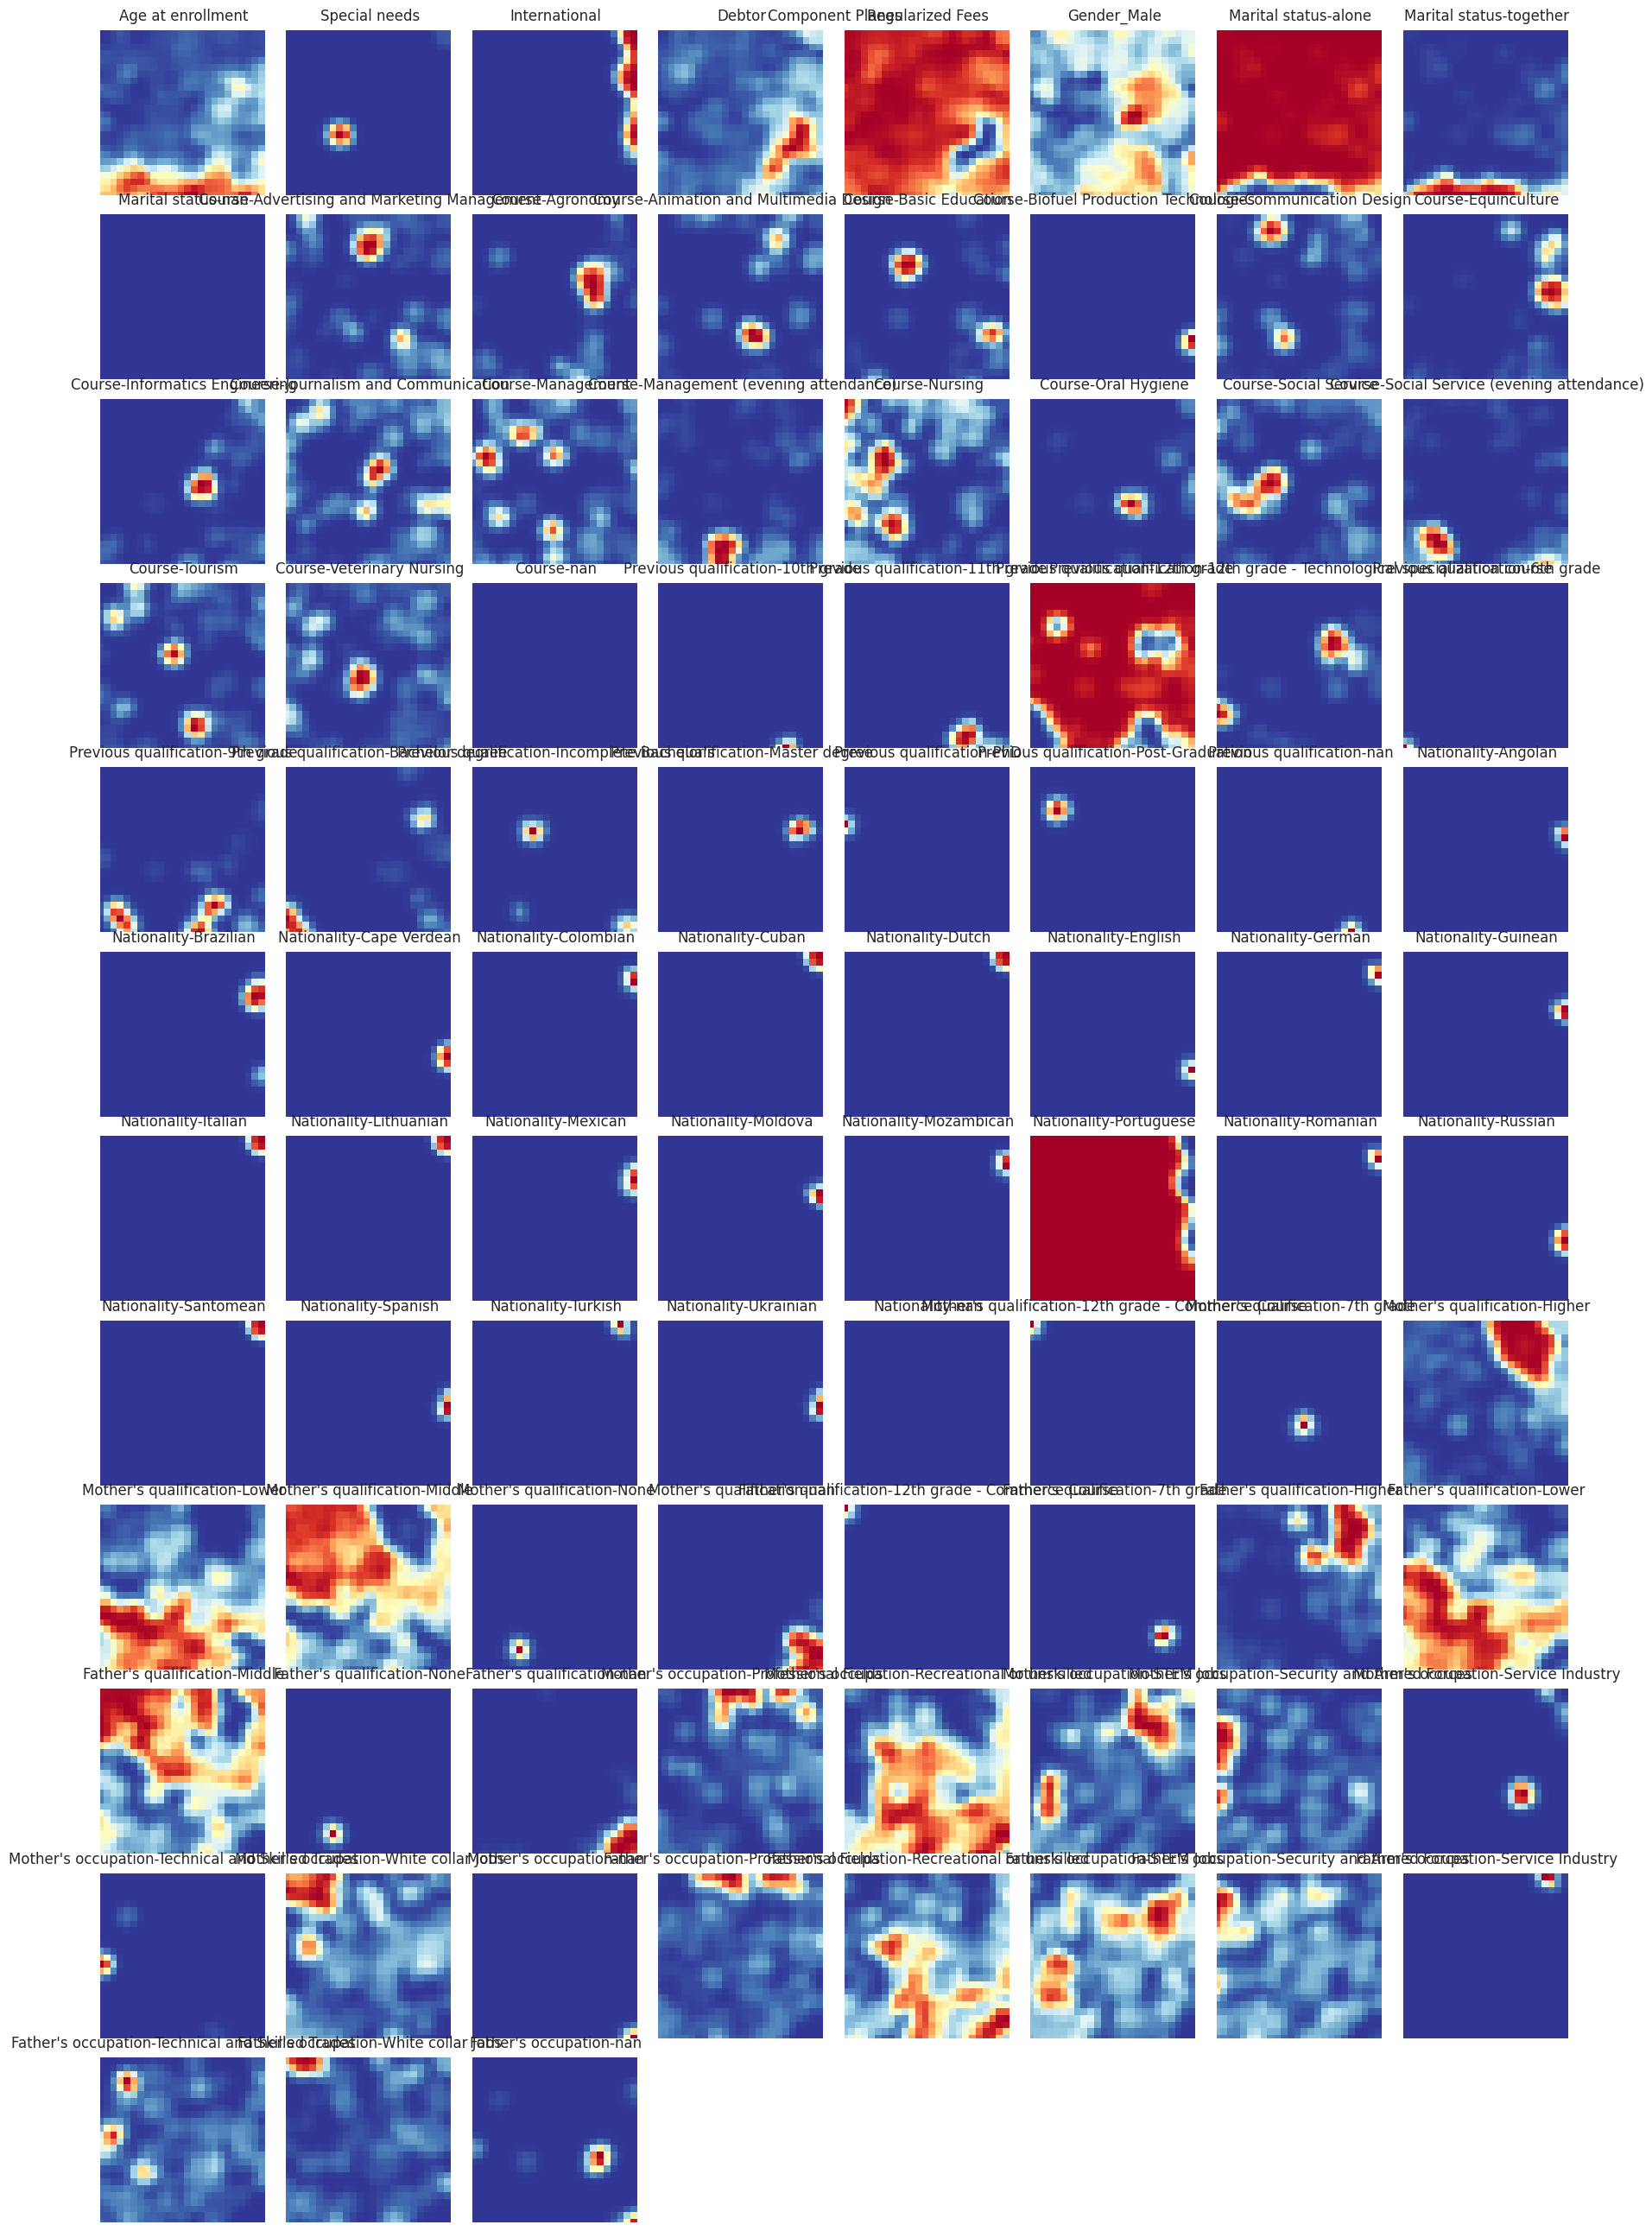

In [147]:
som=somFunc(np.float32(dataDemographicDF),25,25,True,True,dataDemographicDF.columns)

In [153]:
# cl = som.cluster(n_clusters=4)
bmus = som.project_data(np.float32(dataDemographicDF))
som.cluster(n_clusters=10)
labels = getattr(som, 'cluster_labels')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


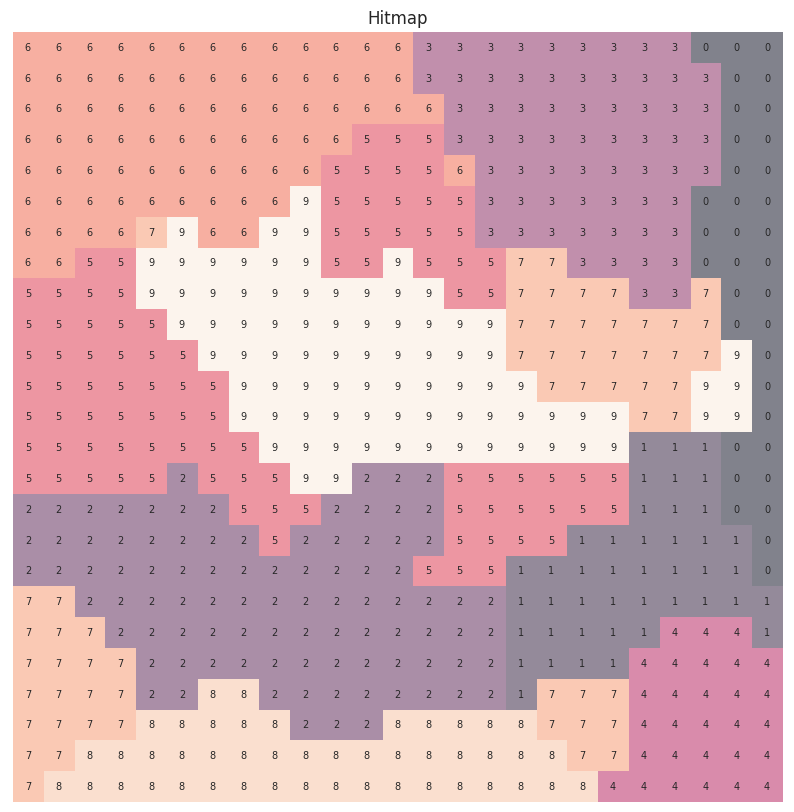

In [154]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [157]:
dataDemographicDF['bmu'] = bmus
dataDemographicDF['label'] = labels[dataDemographicDF['bmu']]

demographicResults=dataDF.copy(deep=True)
demographicResults['label']=dataDemographicDF['label']

<ipython-input-66-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:19: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-66-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


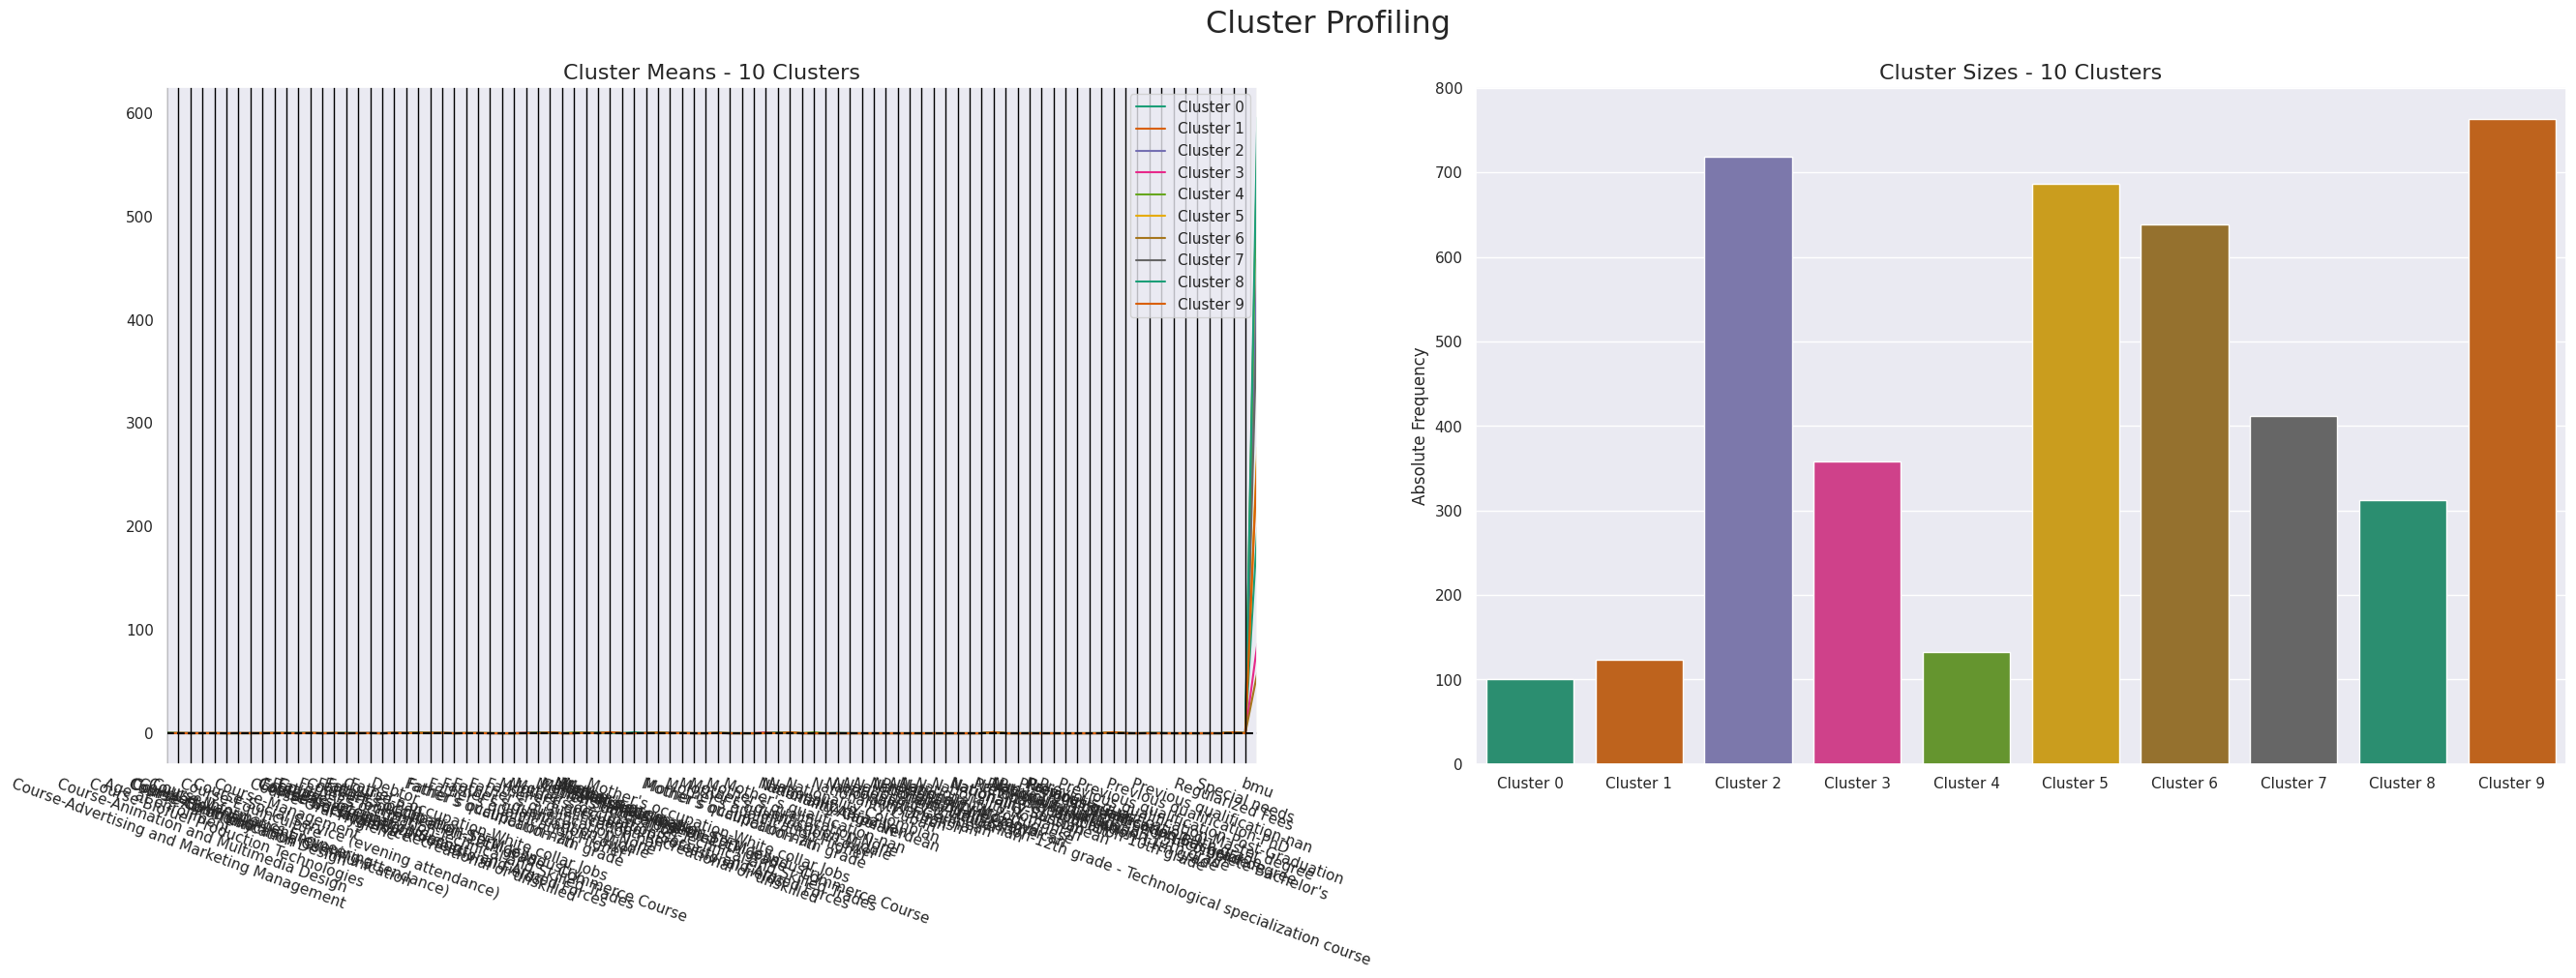

In [159]:
cluster_profiles(dataDemographicDF[dataDemographicDF.columns.difference(['label'])].join(dataDemographicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/92 [00:00<?, ?it/s]

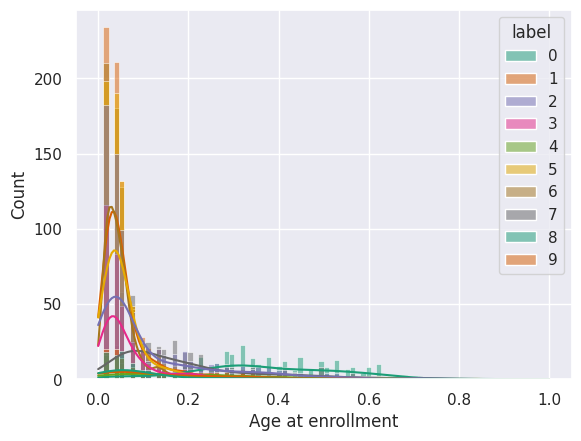

  1%|          | 1/92 [00:03<05:11,  3.42s/it]

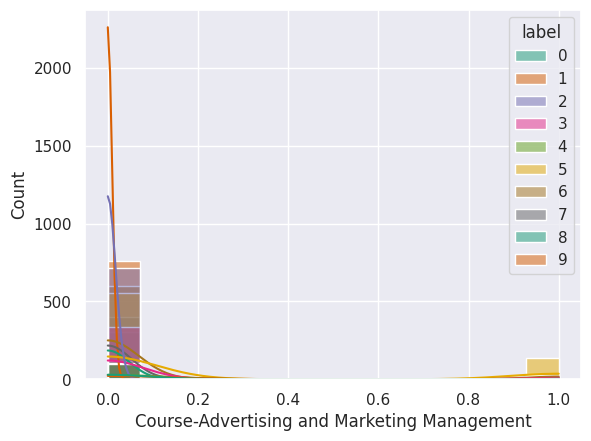

  2%|▏         | 2/92 [00:04<03:24,  2.27s/it]

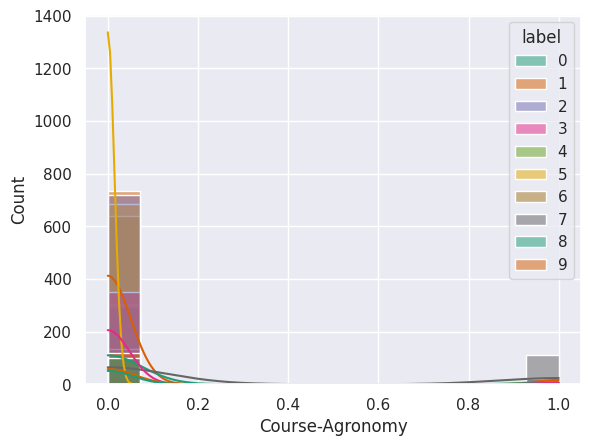

  3%|▎         | 3/92 [00:05<02:21,  1.59s/it]

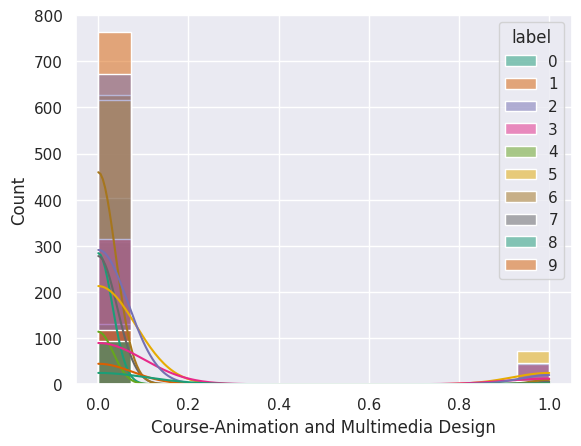

  4%|▍         | 4/92 [00:06<01:51,  1.27s/it]

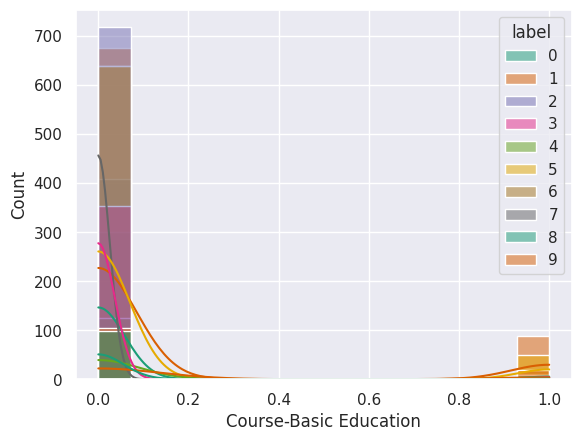

  5%|▌         | 5/92 [00:07<01:34,  1.09s/it]

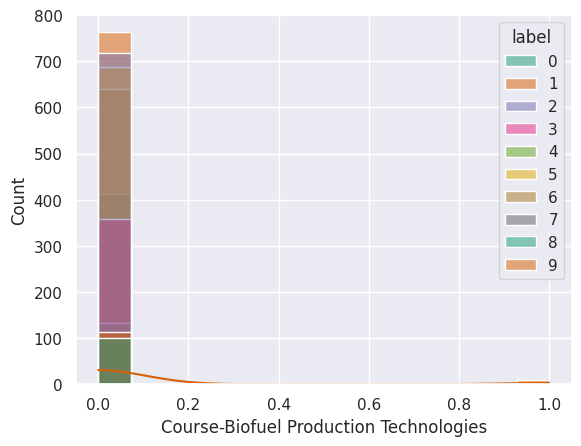

  7%|▋         | 6/92 [00:07<01:23,  1.03it/s]

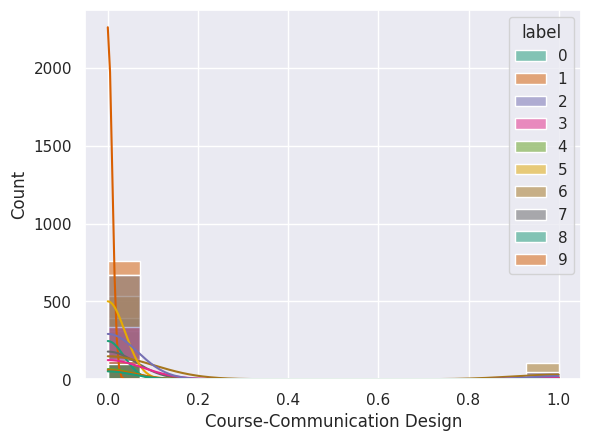

  8%|▊         | 7/92 [00:08<01:19,  1.07it/s]

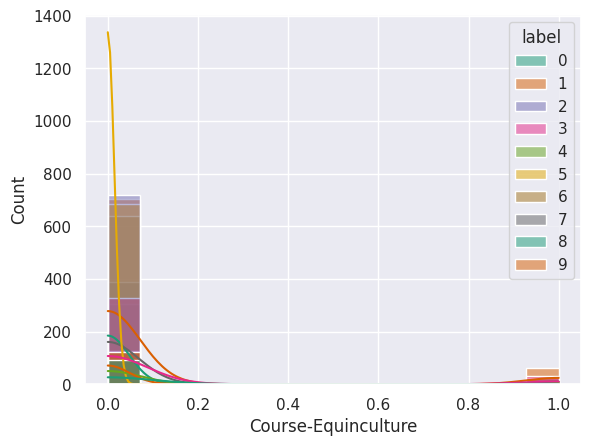

  9%|▊         | 8/92 [00:09<01:23,  1.00it/s]

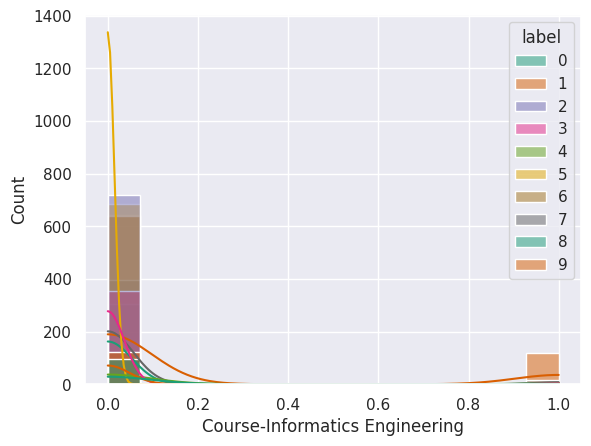

 10%|▉         | 9/92 [00:11<01:26,  1.04s/it]

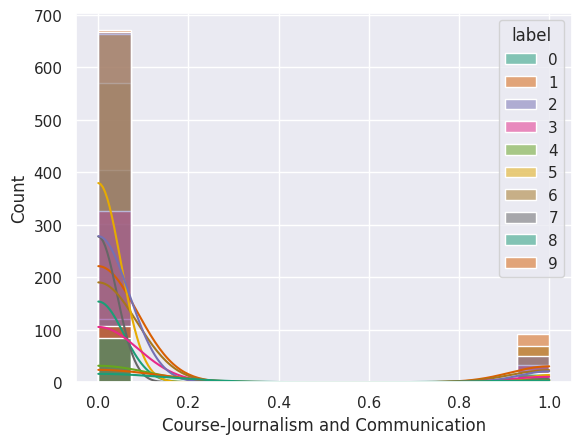

 11%|█         | 10/92 [00:12<01:29,  1.09s/it]

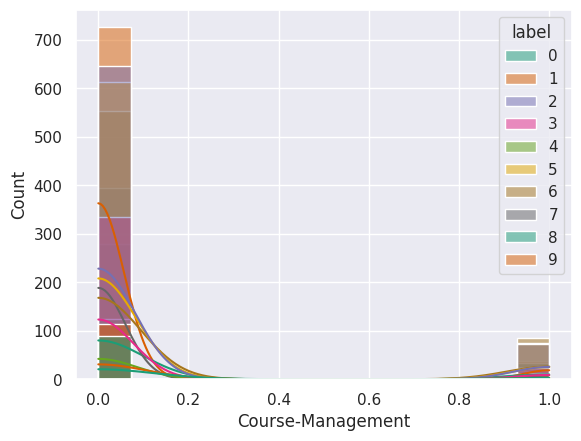

 12%|█▏        | 11/92 [00:13<01:28,  1.10s/it]

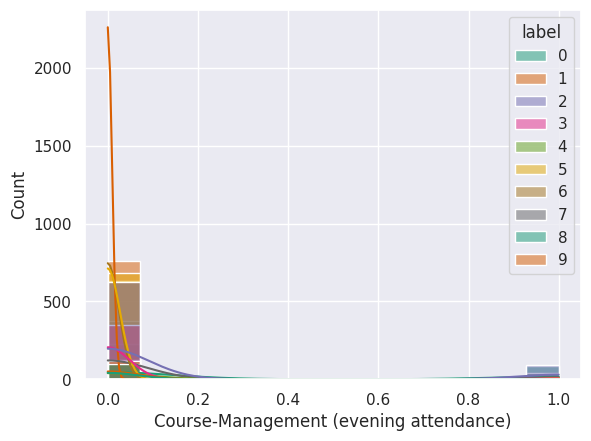

 13%|█▎        | 12/92 [00:14<01:20,  1.00s/it]

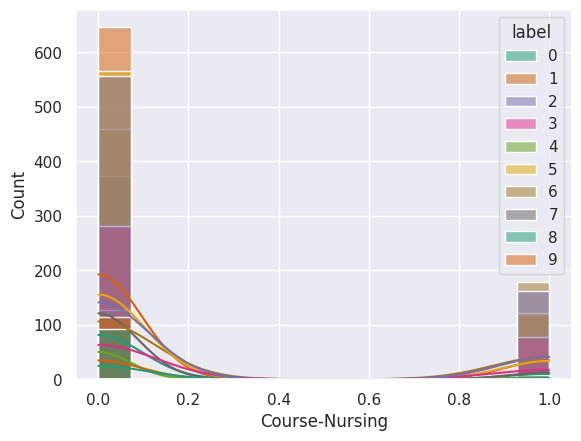

 14%|█▍        | 13/92 [00:14<01:13,  1.07it/s]

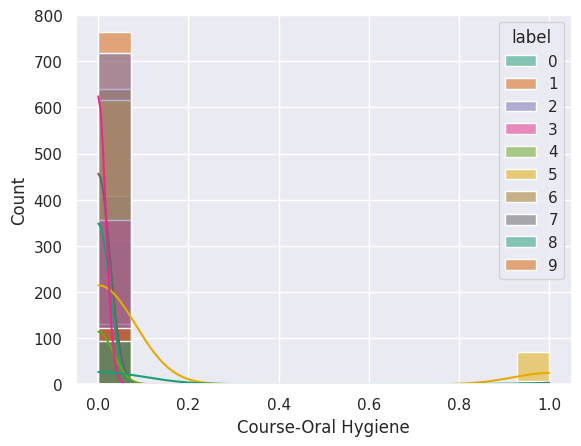

 15%|█▌        | 14/92 [00:15<01:09,  1.13it/s]

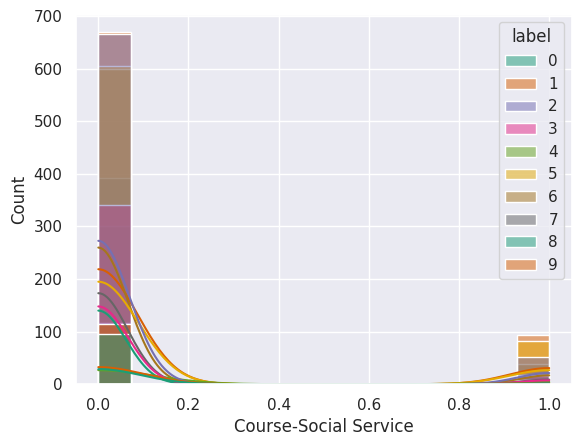

 16%|█▋        | 15/92 [00:16<01:05,  1.18it/s]

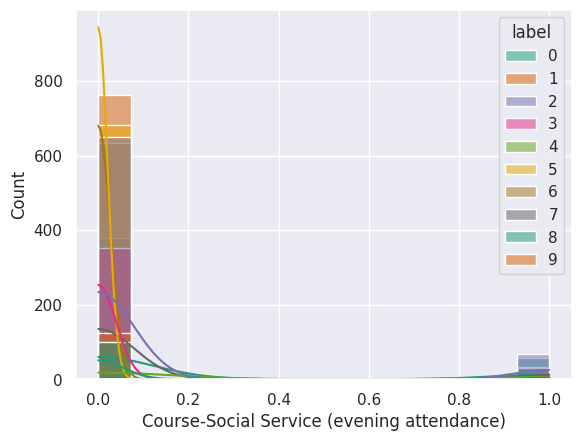

 17%|█▋        | 16/92 [00:17<01:02,  1.22it/s]

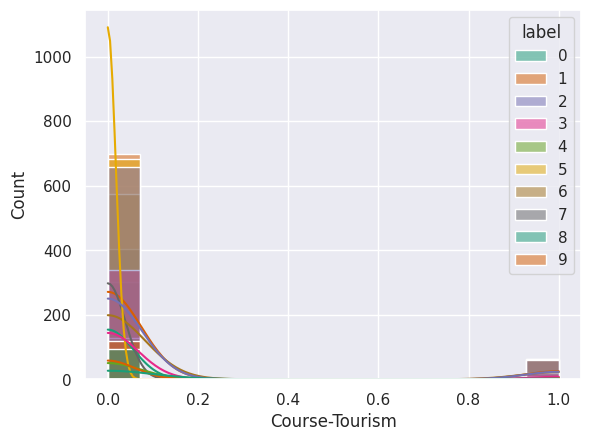

 18%|█▊        | 17/92 [00:18<01:19,  1.06s/it]


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

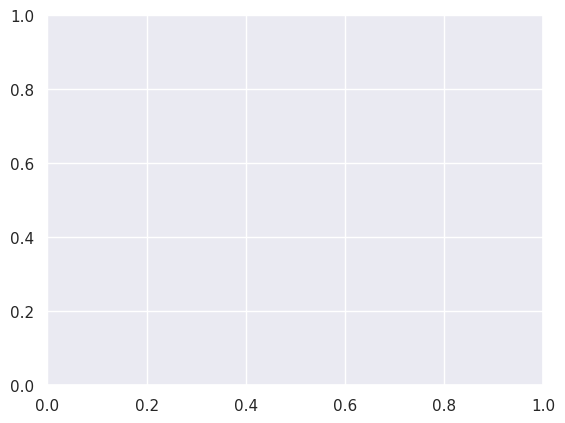

In [162]:
for i in tqdm(dataDemographicDF.columns.difference(['bmus','Course-Veterinary Nursing'])):
    sns.histplot(dataDemographicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [245]:
dataDemographicDF.groupby(['label']).describe().T

label                                   0            1          2
Age at enrollment       count  379.000000  3820.000000  46.000000
                        mean     0.359188     0.090344   0.066038
                        std      0.163376     0.112369   0.074496
                        min      0.018868     0.000000   0.000000
                        25%      0.264151     0.018868   0.018868
                        50%      0.339623     0.056604   0.037736
                        75%      0.490566     0.094340   0.075472
                        max      0.849057     1.000000   0.433962
Special needs           count  379.000000  3820.000000  46.000000
                        mean     0.002639     0.000000   1.000000
                        std      0.051367     0.000000   0.000000
                        min      0.000000     0.000000   1.000000
                        25%      0.000000     0.000000   1.000000
                        50%      0.000000     0.000000   1.000000
                        75%      0.000000     0.000000   1.000000
                        max      1.000000     0.000000   1.000000
Marital status-alone    count  379.000000  3820.000000  46.000000
                        mean     0.000000     1.000000   1.000000
                        std      0.000000     0.000000   0.000000
                        min      0.000000     1.000000   1.000000
                        25%      0.000000     1.000000   1.000000
                        50%      0.000000     1.000000   1.000000
                        75%      0.000000     1.000000   1.000000
                        max      0.000000     1.000000   1.000000
Marital status-together count  379.000000  3820.000000  46.000000
                        mean     1.000000     0.000000   0.000000
                        std      0.000000     0.000000   0.000000
                        min      1.000000     0.000000   0.000000
                        25%      1.000000     0.000000   0.000000
                        50%      1.000000     0.000000   0.000000
                        75%      1.000000     0.000000   0.000000
                        max      1.000000     0.000000   0.000000
Marital status-nan      count  379.000000  3820.000000  46.000000
                        mean     0.000000     0.000000   0.000000
                        std      0.000000     0.000000   0.000000
                        min      0.000000     0.000000   0.000000
                        25%      0.000000     0.000000   0.000000
                        50%      0.000000     0.000000   0.000000
                        75%      0.000000     0.000000   0.000000
                        max      0.000000     0.000000   0.000000
bmu                     count  379.000000  3820.000000  46.000000
                        mean   485.833773   149.467539  39.369565
                        std    116.650753   146.808425  17.104072
                        min    149.000000    12.000000  17.000000
                        25%    424.000000    33.000000  22.000000
                        50%    519.000000   114.000000  43.000000
                        75%    570.000000   210.000000  46.000000
                        max    622.000000   607.000000  74.000000

In [246]:
motherOccupation = [s for s in data.columns if s.startswith("Mother\'s occupation")]
fatherOccupation = [s for s in data.columns if s.startswith("Father\'s occupation")]
parentsOccupation=motherOccupation+fatherOccupation
parentsOccupation

["Mother's occupation-Professional Fields",
 "Mother's occupation-Recreational or unskilled",
 "Mother's occupation-STEM Jobs",
 "Mother's occupation-Security and Armed Forces",
 "Mother's occupation-Service Industry",
 "Mother's occupation-Technical and Skilled Trades",
 "Mother's occupation-White collar Jobs",
 "Mother's occupation-nan",
 "Father's occupation-Professional Fields",
 "Father's occupation-Recreational or unskilled",
 "Father's occupation-STEM Jobs",
 "Father's occupation-Security and Armed Forces",
 "Father's occupation-Service Industry",
 "Father's occupation-Technical and Skilled Trades",
 "Father's occupation-White collar Jobs",
 "Father's occupation-nan"]

In [247]:
demographicResults=dataDF.copy(deep=True)
demographicResults=getDummies(demographicResults)
demographicResults['label']=dataDemographicDF['label']

In [248]:
demographicResults[['label','Success']+parentsOccupation].groupby(['label']).describe().T

label                   0            1          2
Success count  379.000000  3820.000000  46.000000
        mean     0.923483     1.204974   1.130435
        std      0.929785     0.881052   0.884652
        min      0.000000     0.000000   0.000000
        25%      0.000000     0.000000   0.000000
        50%      1.000000     2.000000   1.000000
        75%      2.000000     2.000000   2.000000
        max      2.000000     2.000000   2.000000

# DemographicPCA

In [ ]:
# demographicData=['Mother\'s qualification','Father\'s qualification']
# demographicData=['Mother\'s occupation','Father\'s occupation']
demographicData=['Age at enrollment','Marital status','Special needs']

In [ ]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataDemographicDF = data[demographicData]
dataDemographicDF = getDummies(dataDemographicDF)
dataDemographicDF = scaleData(dataDemographicDF)
data = getDummies(data)
data = scaleData(data)

In [ ]:
df_som = np.float32(data.values)
rows = 25
cols = 25
mapsize: list[int] = [rows, cols]

som: sompy.sompy.SOM = SOMFactory().build(df_som, mapsize, mask=None,
                            mapshape='planar', # 2Dimensions
                            lattice='rect', # topology: 'rect' or 'hexa'
                            normalization='var', # standardize the variables
                            initialization='pca', # initialization of the weights: 'pca' or 'random'
                            neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                            training='batch') # training mode: 'seq' or 'batch'

NameError: name 'np' is not defined

/usr/local/lib/python3.10/dist-packages/sompy/sompy.py:344: RuntimeWarning: invalid value encountered in sqrt
  np.mean(np.sqrt(bmu[1] + fixed_euclidean_x2))) #lbugnon: ojo aca me tiró un warning, revisar (commit sinc: 965666d3d4d93bcf48e8cef6ea2c41a018c1cb83 )
/usr/local/lib/python3.10/dist-packages/sompy/sompy.py:357: RuntimeWarning: invalid value encountered in sqrt
  bmu[1] = np.sqrt(bmu[1] + fixed_euclidean_x2)


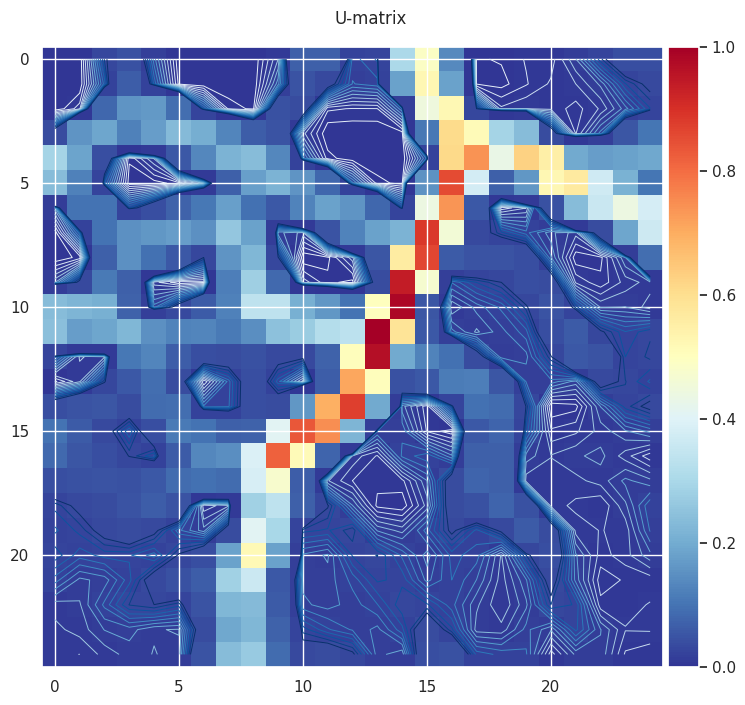

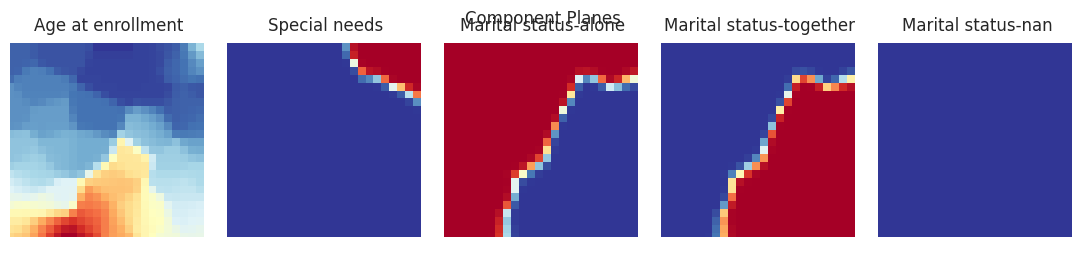

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dataDemographicDF=somWrap(dataDemographicDF,True,3)

In [ ]:
dataDemographicDF.groupby(['label']).describe().T

label                                   0            1          2
Age at enrollment       count  379.000000  3820.000000  46.000000
                        mean     0.359188     0.090344   0.066038
                        std      0.163376     0.112369   0.074496
                        min      0.018868     0.000000   0.000000
                        25%      0.264151     0.018868   0.018868
                        50%      0.339623     0.056604   0.037736
                        75%      0.490566     0.094340   0.075472
                        max      0.849057     1.000000   0.433962
Special needs           count  379.000000  3820.000000  46.000000
                        mean     0.002639     0.000000   1.000000
                        std      0.051367     0.000000   0.000000
                        min      0.000000     0.000000   1.000000
                        25%      0.000000     0.000000   1.000000
                        50%      0.000000     0.000000   1.000000
                        75%      0.000000     0.000000   1.000000
                        max      1.000000     0.000000   1.000000
Marital status-alone    count  379.000000  3820.000000  46.000000
                        mean     0.000000     1.000000   1.000000
                        std      0.000000     0.000000   0.000000
                        min      0.000000     1.000000   1.000000
                        25%      0.000000     1.000000   1.000000
                        50%      0.000000     1.000000   1.000000
                        75%      0.000000     1.000000   1.000000
                        max      0.000000     1.000000   1.000000
Marital status-together count  379.000000  3820.000000  46.000000
                        mean     1.000000     0.000000   0.000000
                        std      0.000000     0.000000   0.000000
                        min      1.000000     0.000000   0.000000
                        25%      1.000000     0.000000   0.000000
                        50%      1.000000     0.000000   0.000000
                        75%      1.000000     0.000000   0.000000
                        max      1.000000     0.000000   0.000000
Marital status-nan      count  379.000000  3820.000000  46.000000
                        mean     0.000000     0.000000   0.000000
                        std      0.000000     0.000000   0.000000
                        min      0.000000     0.000000   0.000000
                        25%      0.000000     0.000000   0.000000
                        50%      0.000000     0.000000   0.000000
                        75%      0.000000     0.000000   0.000000
                        max      0.000000     0.000000   0.000000
bmu                     count  379.000000  3820.000000  46.000000
                        mean   485.833773   149.467539  39.369565
                        std    116.650753   146.808425  17.104072
                        min    149.000000    12.000000  17.000000
                        25%    424.000000    33.000000  22.000000
                        50%    519.000000   114.000000  43.000000
                        75%    570.000000   210.000000  46.000000
                        max    622.000000   607.000000  74.000000

In [ ]:
motherOccupation = [s for s in data.columns if s.startswith("Mother\'s occupation")]
fatherOccupation = [s for s in data.columns if s.startswith("Father\'s occupation")]
parentsOccupation=motherOccupation+fatherOccupation
parentsOccupation

["Mother's occupation-Professional Fields",
 "Mother's occupation-Recreational or unskilled",
 "Mother's occupation-STEM Jobs",
 "Mother's occupation-Security and Armed Forces",
 "Mother's occupation-Service Industry",
 "Mother's occupation-Technical and Skilled Trades",
 "Mother's occupation-White collar Jobs",
 "Mother's occupation-nan",
 "Father's occupation-Professional Fields",
 "Father's occupation-Recreational or unskilled",
 "Father's occupation-STEM Jobs",
 "Father's occupation-Security and Armed Forces",
 "Father's occupation-Service Industry",
 "Father's occupation-Technical and Skilled Trades",
 "Father's occupation-White collar Jobs",
 "Father's occupation-nan"]

In [ ]:
demographicResults=dataDF.copy(deep=True)
demographicResults=getDummies(demographicResults)
demographicResults['label']=dataDemographicDF['label']

In [ ]:
demographicResults[['label','Success']+parentsOccupation].groupby(['label']).describe().T

label                   0            1          2
Success count  379.000000  3820.000000  46.000000
        mean     0.923483     1.204974   1.130435
        std      0.929785     0.881052   0.884652
        min      0.000000     0.000000   0.000000
        25%      0.000000     0.000000   0.000000
        50%      1.000000     2.000000   1.000000
        75%      2.000000     2.000000   2.000000
        max      2.000000     2.000000   2.000000